I use a public dataset of monthly carbon dioxide emissions from electricity generation available at the Energy Information Administration and Jason McNeill. The dataset includes CO2 emissions from each energy resource starting January 1973 to July 2016 for reference click [here](https://www.kaggle.com/txtrouble/carbon-emissions/data). 

In [133]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [134]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

## Preprocessing 

In [135]:
df = pd.read_csv("MER_T12_06.csv")
df.head()

MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


The dataset has 6 columns where 2 of them are integer data type and 4 objects and 5096 observations. The above dataset retriving method only retrives the dataset as a dataframe that is not as a time series dataset. To read the dataset as a time series, we have to pass special arguments to the read_csv command as given below.

In [137]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

The arguments can be explained:
- parse_dates: This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
- index_col: This is a key that forces pandas to use the date time column as index.
- date_parser: Converts an input string into datetime variable.

In [138]:
df.head(15)

MSN    Value  Column_Order  \
YYYYMM                                       
1973-01-01  CLEIEUS   72.076             1   
1973-02-01  CLEIEUS   64.442             1   
1973-03-01  CLEIEUS   64.084             1   
1973-04-01  CLEIEUS   60.842             1   
1973-05-01  CLEIEUS   61.798             1   
1973-06-01  CLEIEUS   66.538             1   
1973-07-01  CLEIEUS   72.626             1   
1973-08-01  CLEIEUS   75.181             1   
1973-09-01  CLEIEUS   68.397             1   
1973-10-01  CLEIEUS   67.668             1   
1973-11-01  CLEIEUS   67.021             1   
1973-12-01  CLEIEUS   71.118             1   
NaT         CLEIEUS  811.791             1   
1974-01-01  CLEIEUS    70.55             1   
1974-02-01  CLEIEUS   62.929             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   
1973-11-01  Coal Electric Power Sector CO2 Emissions   
1973-12-01  Coal Electric Power Sector CO2 Emissions   
NaT         Coal Electric Power Sector CO2 Emissions   
1974-01-01  Coal Electric Power Sector CO2 Emissions   
1974-02-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide  
1973-11-01  Million Metric Tons of Carbon Dioxide  
1973-12-01  Million Metric Tons of Carbon Dioxide  
NaT         Million Metric Tons of Carbon Dioxide  
1974-01-01  Million Metric Tons of Carbon Dioxide  
1974-02-01  Million Metric Tons of Carbon Dioxide

In [139]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   
1973-06-01  CLEIEUS  66.538             1   
1973-07-01  CLEIEUS  72.626             1   
1973-08-01  CLEIEUS  75.181             1   
1973-09-01  CLEIEUS  68.397             1   
1973-10-01  CLEIEUS  67.668             1   
1973-11-01  CLEIEUS  67.021             1   
1973-12-01  CLEIEUS  71.118             1   
1974-01-01  CLEIEUS   70.55             1   
1974-02-01  CLEIEUS  62.929             1   
1974-03-01  CLEIEUS  64.519             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   
1973-11-01  Coal Electric Power Sector CO2 Emissions   
1973-12-01  Coal Electric Power Sector CO2 Emissions   
1974-01-01  Coal Electric Power Sector CO2 Emissions   
1974-02-01  Coal Electric Power Sector CO2 Emissions   
1974-03-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide  
1973-11-01  Million Metric Tons of Carbon Dioxide  
1973-12-01  Million Metric Tons of Carbon Dioxide  
1974-01-01  Million Metric Tons of Carbon Dioxide  
1974-02-01  Million Metric Tons of Carbon Dioxide  
1974-03-01  Million Metric Tons of Carbon Dioxide

In [140]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

As we can see from the ts data type, the emission value is represented as an object. Let us first convert the emision value into numeric value as follows

In [141]:
#ss = ts.copy(deep=True)
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

In [142]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4707 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4707 non-null   int64  
 3   Description   4707 non-null   object 
 4   Unit          4707 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


In [143]:
ts.dropna(inplace = True)

The dataset has 8 energy sources of CO2 emission. In the following cell, we will group the CO2 Emission dataset based on the type of energy source.

In [144]:
Energy_sources = ts.groupby('Description')
Energy_sources.head()

MSN    Value  Column_Order  \
YYYYMM                                       
1973-01-01  CLEIEUS   72.076             1   
1973-02-01  CLEIEUS   64.442             1   
1973-03-01  CLEIEUS   64.084             1   
1973-04-01  CLEIEUS   60.842             1   
1973-05-01  CLEIEUS   61.798             1   
1973-01-01  NNEIEUS   12.175             2   
1973-02-01  NNEIEUS   11.708             2   
1973-03-01  NNEIEUS   13.994             2   
1973-04-01  NNEIEUS   14.627             2   
1973-05-01  NNEIEUS   17.344             2   
1973-01-01  DKEIEUS    2.375             3   
1973-02-01  DKEIEUS    2.061             3   
1973-03-01  DKEIEUS    1.171             3   
1973-04-01  DKEIEUS    1.022             3   
1973-05-01  DKEIEUS    0.949             3   
1973-01-01  PCEIEUS    0.128             4   
1973-02-01  PCEIEUS    0.106             4   
1973-03-01  PCEIEUS    0.083             4   
1973-04-01  PCEIEUS    0.130             4   
1973-05-01  PCEIEUS    0.167             4   
1973-01-01  RFEIEUS   24.867             5   
1973-02-01  RFEIEUS   20.867             5   
1973-03-01  RFEIEUS   19.780             5   
1973-04-01  RFEIEUS   16.562             5   
1973-05-01  RFEIEUS   17.754             5   
1973-01-01  PAEIEUS   27.369             6   
1973-02-01  PAEIEUS   23.034             6   
1973-03-01  PAEIEUS   21.034             6   
1973-04-01  PAEIEUS   17.714             6   
1973-05-01  PAEIEUS   18.870             6   
1989-01-01  GEEIEUS    0.031             7   
1989-02-01  GEEIEUS    0.028             7   
1989-03-01  GEEIEUS    0.031             7   
1989-04-01  GEEIEUS    0.030             7   
1989-05-01  GEEIEUS    0.031             7   
1989-01-01  NWEIEUS    0.371             8   
1989-02-01  NWEIEUS    0.335             8   
1989-03-01  NWEIEUS    0.371             8   
1989-04-01  NWEIEUS    0.359             8   
1989-05-01  NWEIEUS    0.371             8   
1973-01-01  TXEIEUS  111.621             9   
1973-02-01  TXEIEUS   99.185             9   
1973-03-01  TXEIEUS   99.112             9   
1973-04-01  TXEIEUS   93.183             9   
1973-05-01  TXEIEUS   98.012             9   

                                                  Description  \
YYYYMM                                                          
1973-01-01           Coal Electric Power Sector CO2 Emissions   
1973-02-01           Coal Electric Power Sector CO2 Emissions   
1973-03-01           Coal Electric Power Sector CO2 Emissions   
1973-04-01           Coal Electric Power Sector CO2 Emissions   
1973-05-01           Coal Electric Power Sector CO2 Emissions   
1973-01-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-02-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-03-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-04-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-05-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-01-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-02-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-03-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-04-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-05-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-01-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-02-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-03-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-04-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-05-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-01-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-02-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-03-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-04-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-05-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-01-01      Petroleum Electric Power Sector CO2 Emissions   
1973-02-01      Petroleum Electri

In [145]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()

For developing the time series model and make forcasting, I will use the natural gas CO2 emission from the electirical power generetion. First, let us slice this data from the ts as follows:  

In [146]:
if not isinstance(ts.index, pd.DatetimeIndex):
    ts['Date'] = pd.to_datetime(ts['Date'])
    ts.set_index('Date', inplace=True)

# Grouping by description and resampling by month
Emissions = ts.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level=0)

# Taking dataset description as input
input_description = input("Enter the dataset description: ")

if input_description in Emissions.columns:
    mte = Emissions[input_description]
    print(mte.head())
else:
    print(f"Dataset '{input_description}' not found in the grouped data.")

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: ME, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64


#  Test Stationary

In [26]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

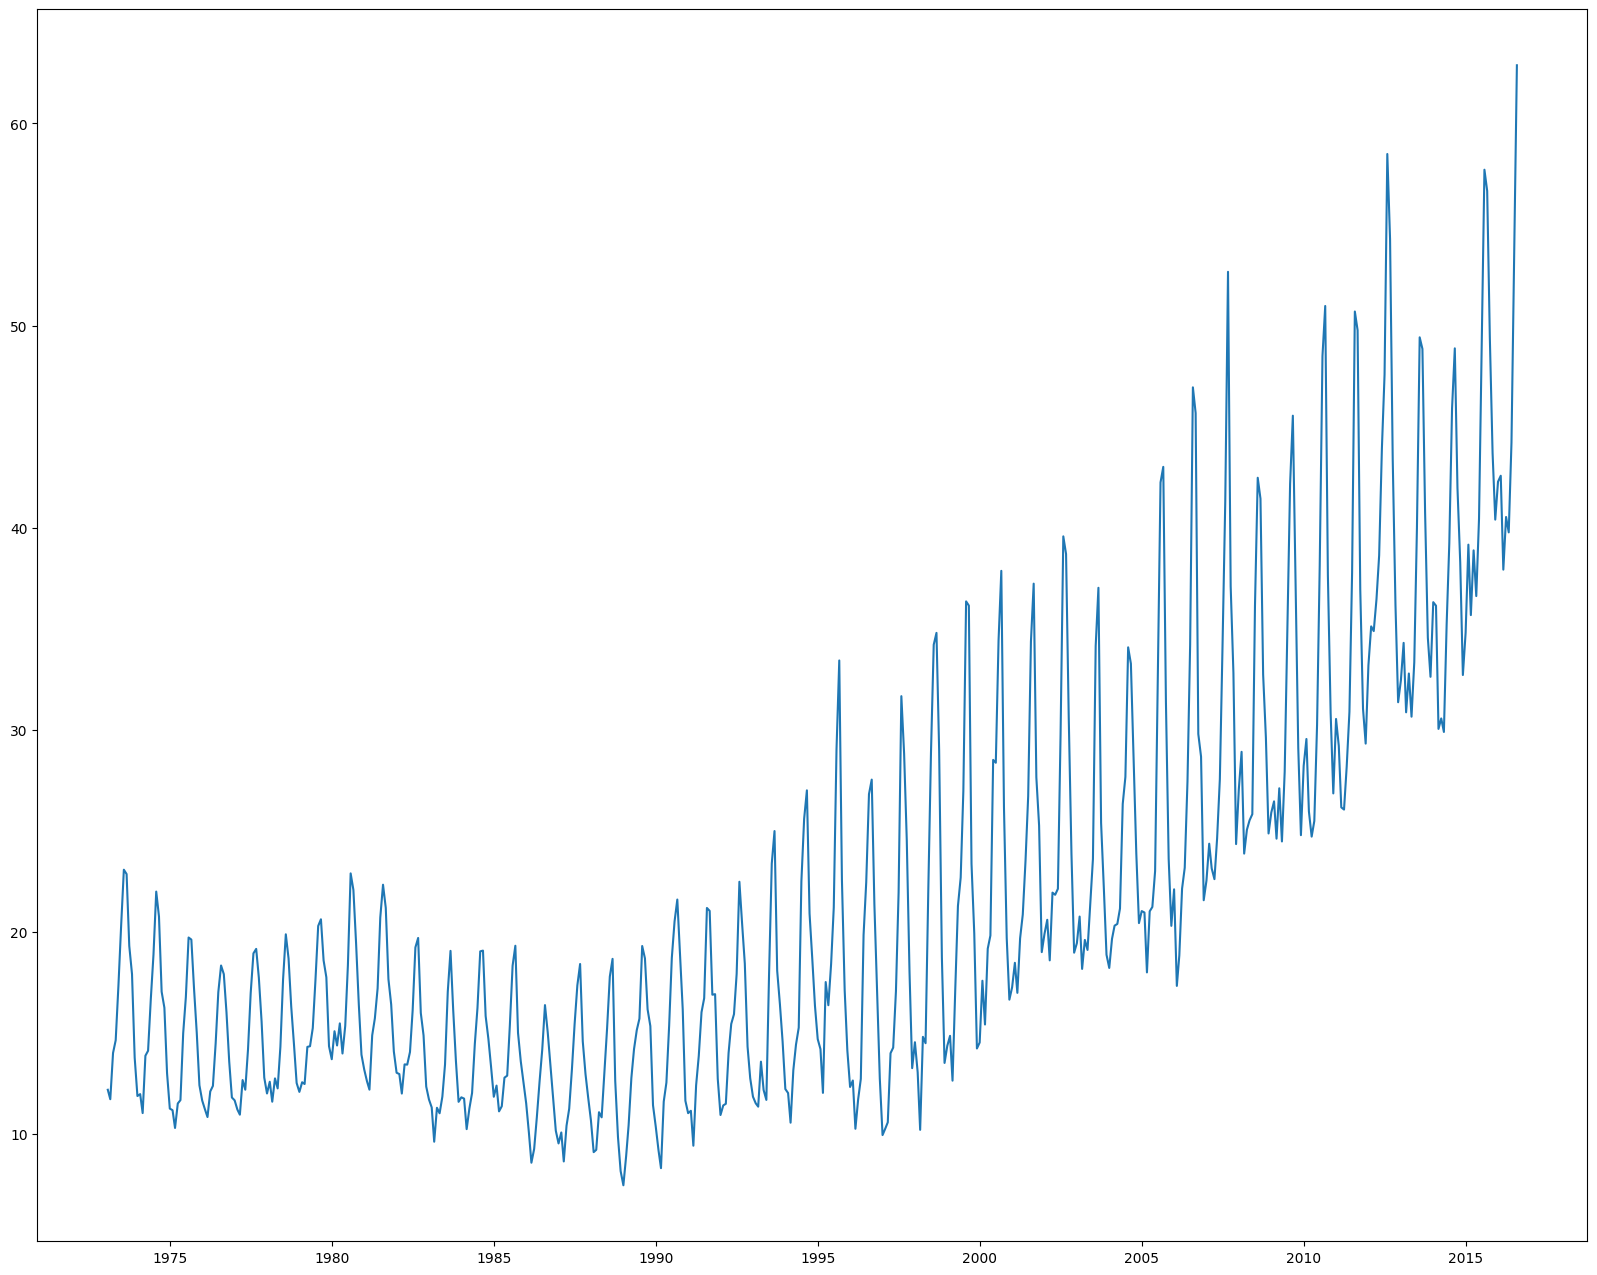

In [27]:
plt.plot(mte)

From the figures, it is evident that there is a trend in the CO2 emission dataset with seasonal variation. So, we can infer a concluding remark that the dataset is not stationary.

# Test  stationary using Dickey-Fuller

In [28]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [29]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

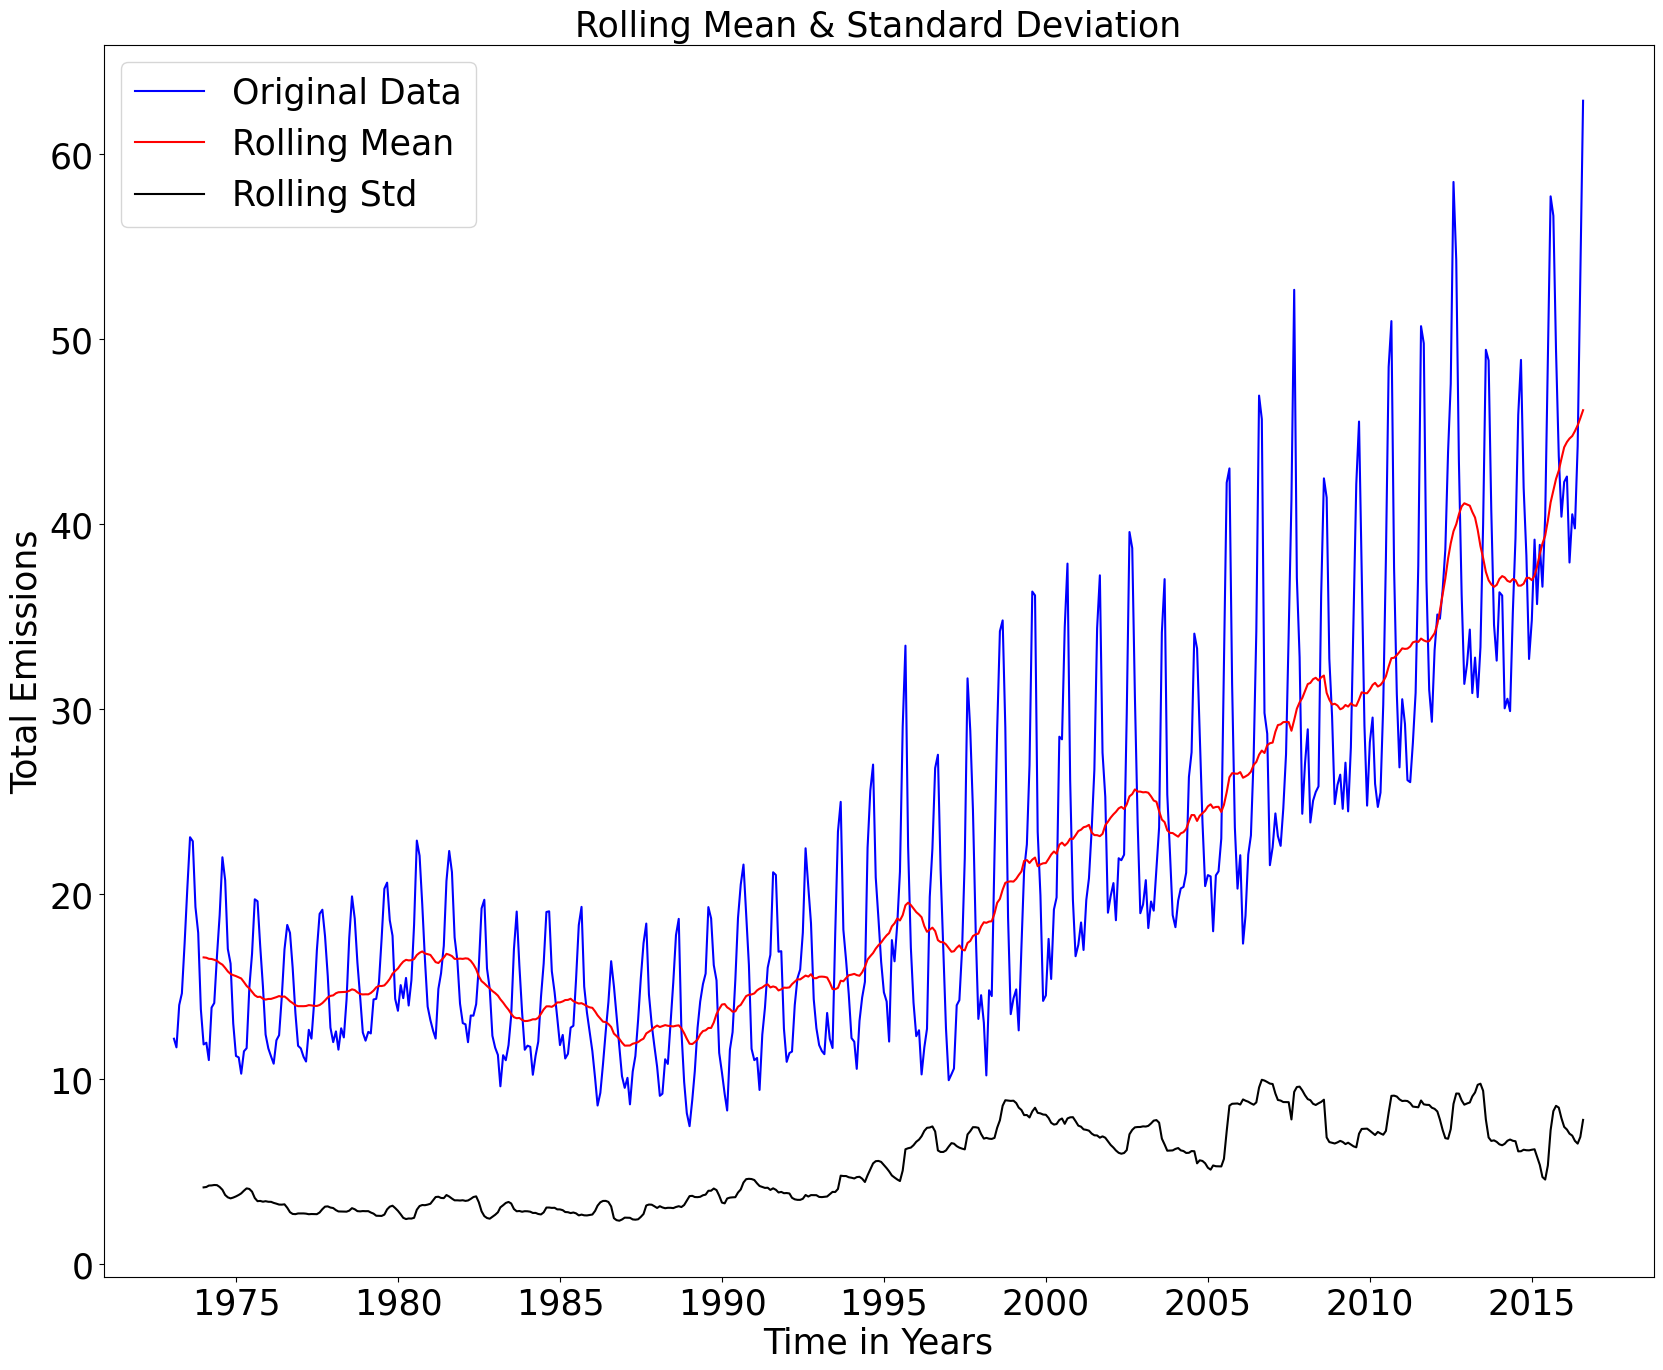

In [30]:
TestStationaryPlot(mte)

In [31]:
TestStationaryAdfuller(mte)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The emissions mean and the variation in standard deviation (black line) clearly vary with time. This shows that the series has a trend. So, it is not a stationary. Also, the Test Statistic is greater than the critical values with 90%, 95% and 99% confidence levels. Hence, no evidence to reject the null hypothesis. Therefore the series is nonstationary. 

#  Differencing

One of the most common method of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the original observation at a particular instant with that at the previous instant. This mostly works well to improve stationarity. First order differencing can be done as follows:

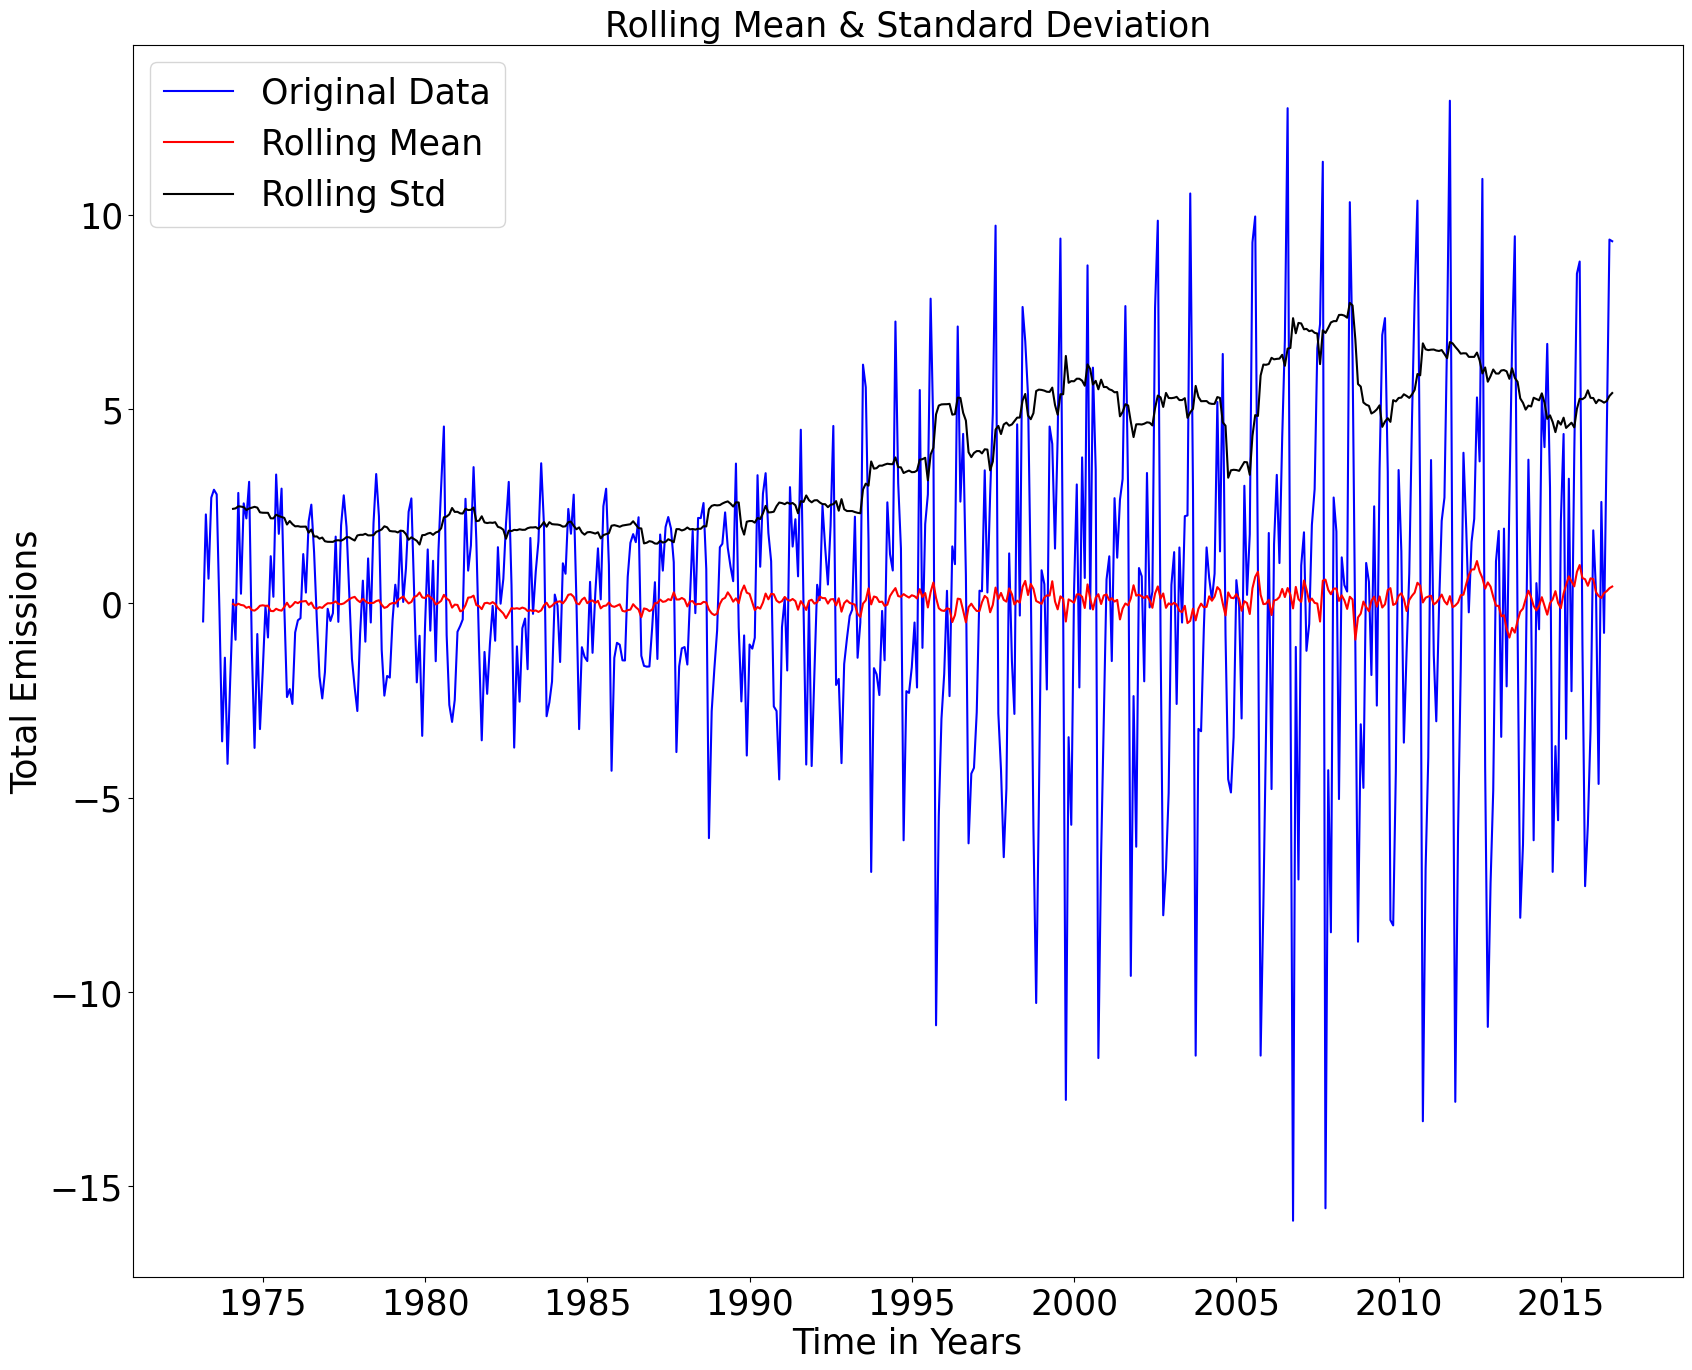

In [32]:
mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [33]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


The first difference improves the stationarity of the series significantly.
Now the  ***seasonal difference*** is removed.

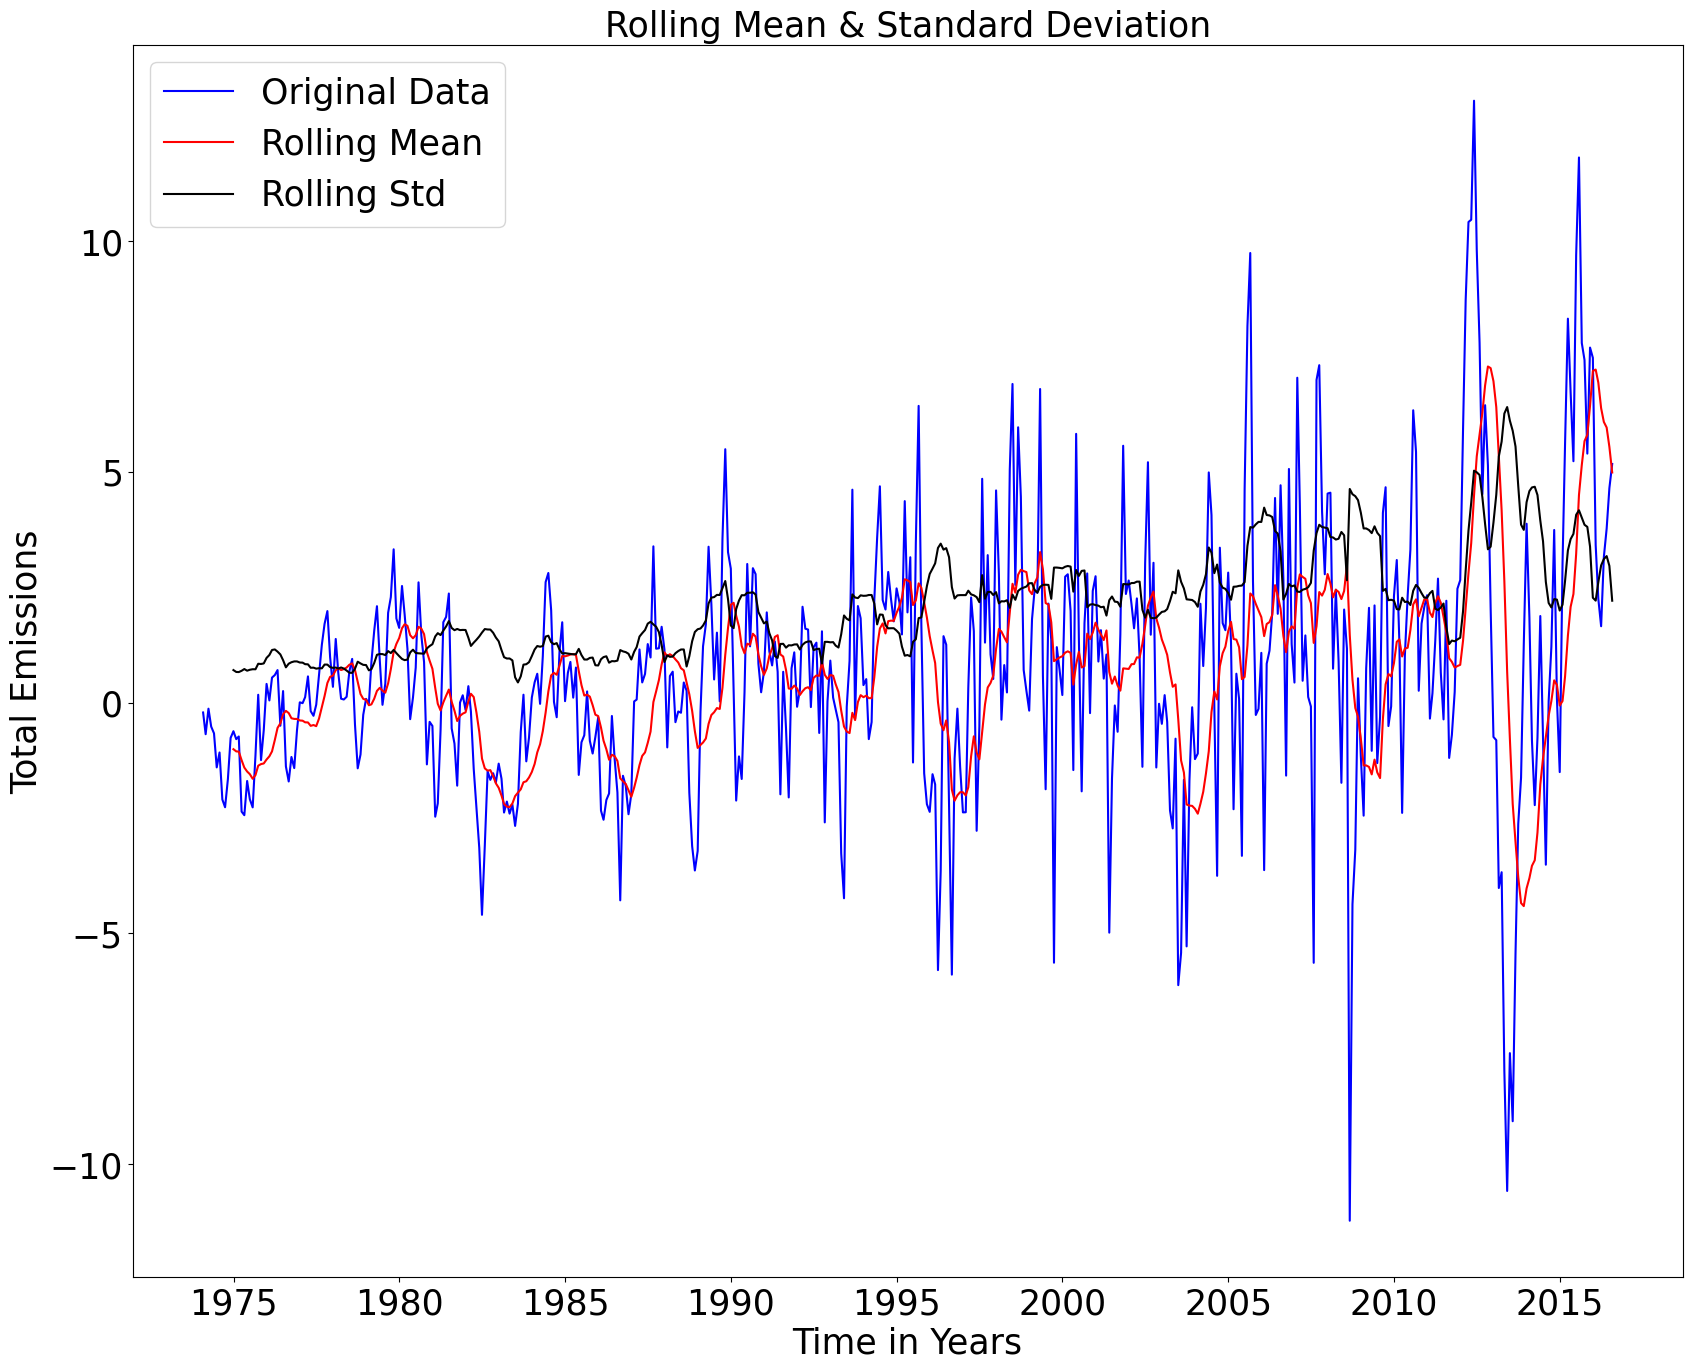

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [34]:
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

Compared to the original data the seasonal difference also improves the stationarity of the series. The next step is to take the first difference of the seasonal difference.

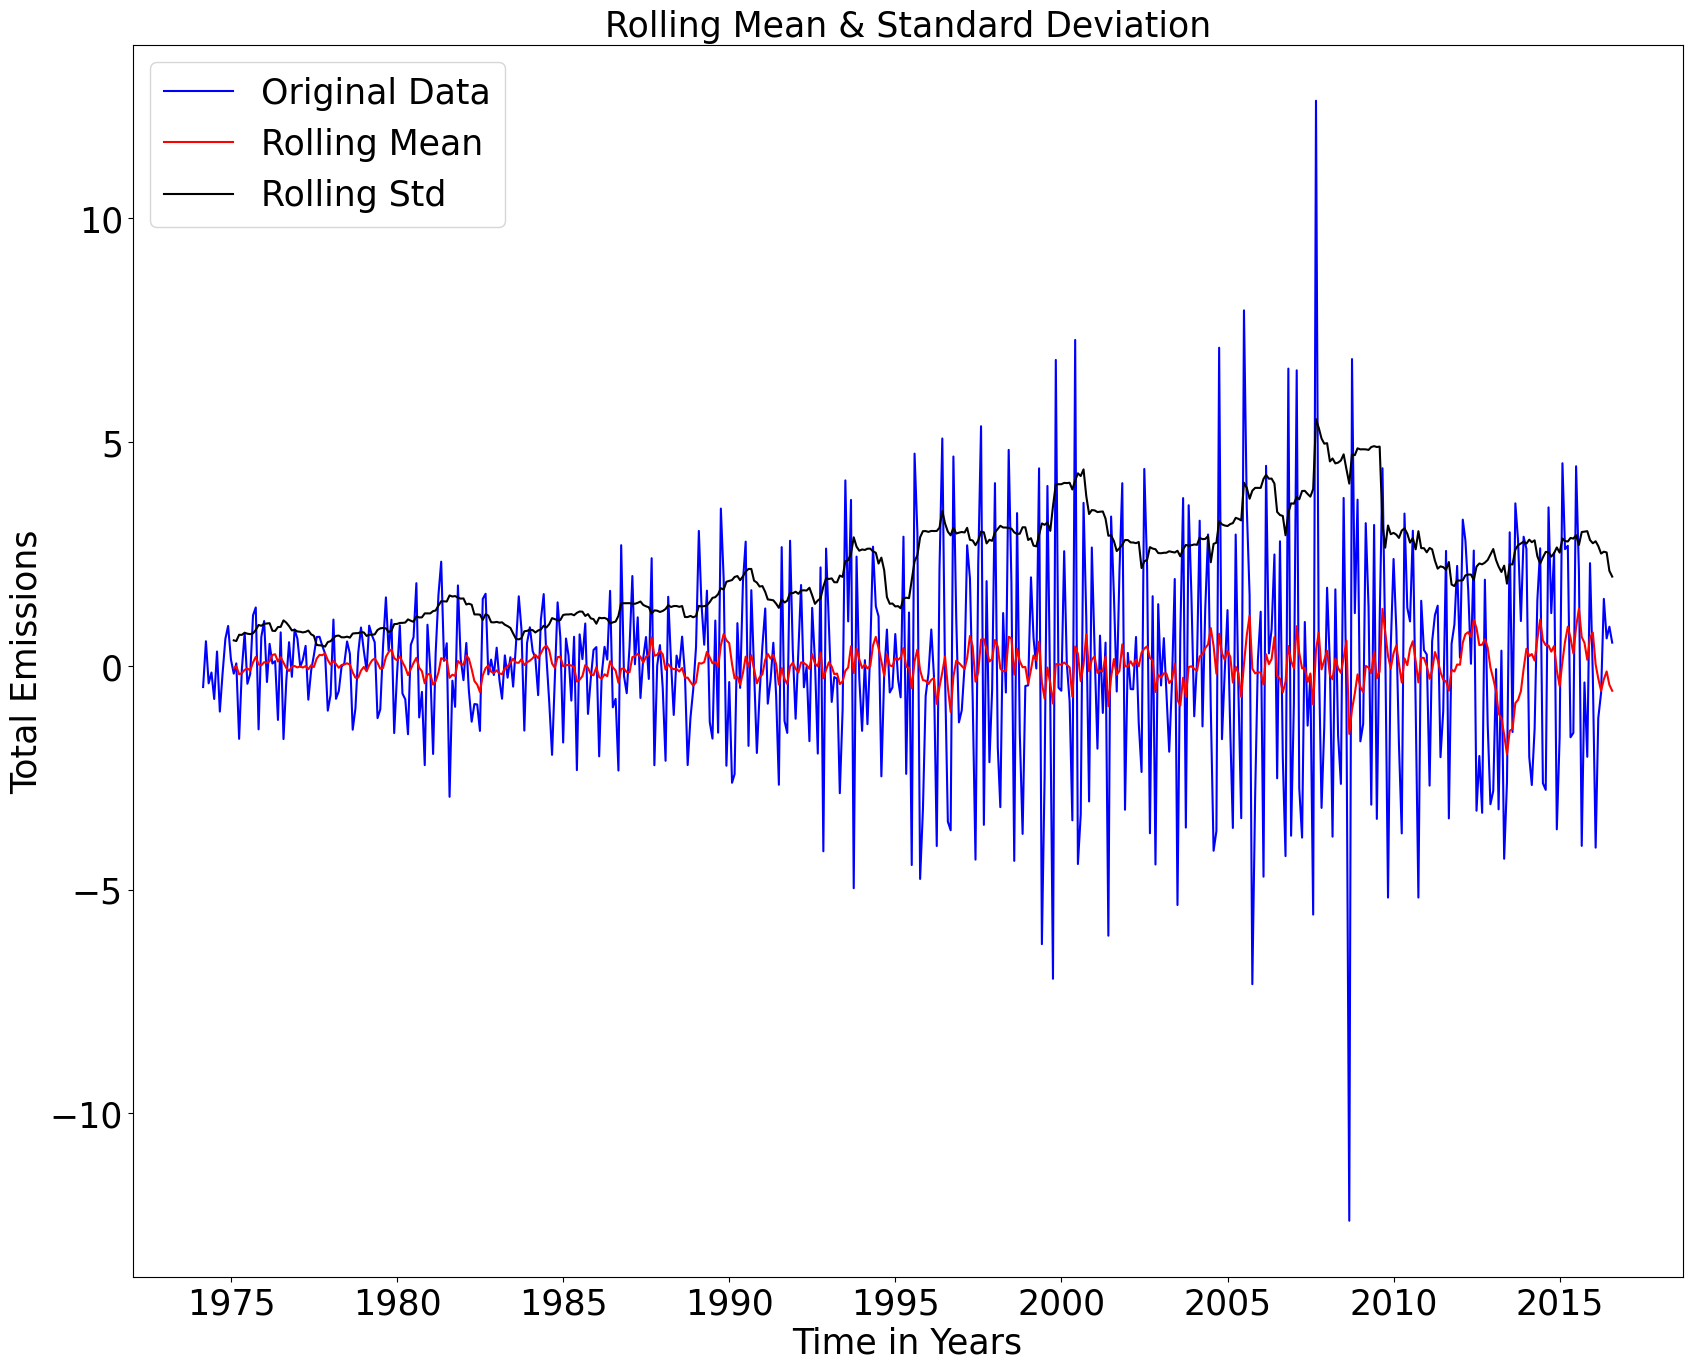

In [35]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [36]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Now, if we look the Test Statistic and the p-value, taking the seasonal first difference has made our the time series dataset stationary. This differencing procedure could be repeated for the log values, but it didn’t make the dataset any more stationary.

# SARIMA 

 trend and seasonality and removing them from the model.

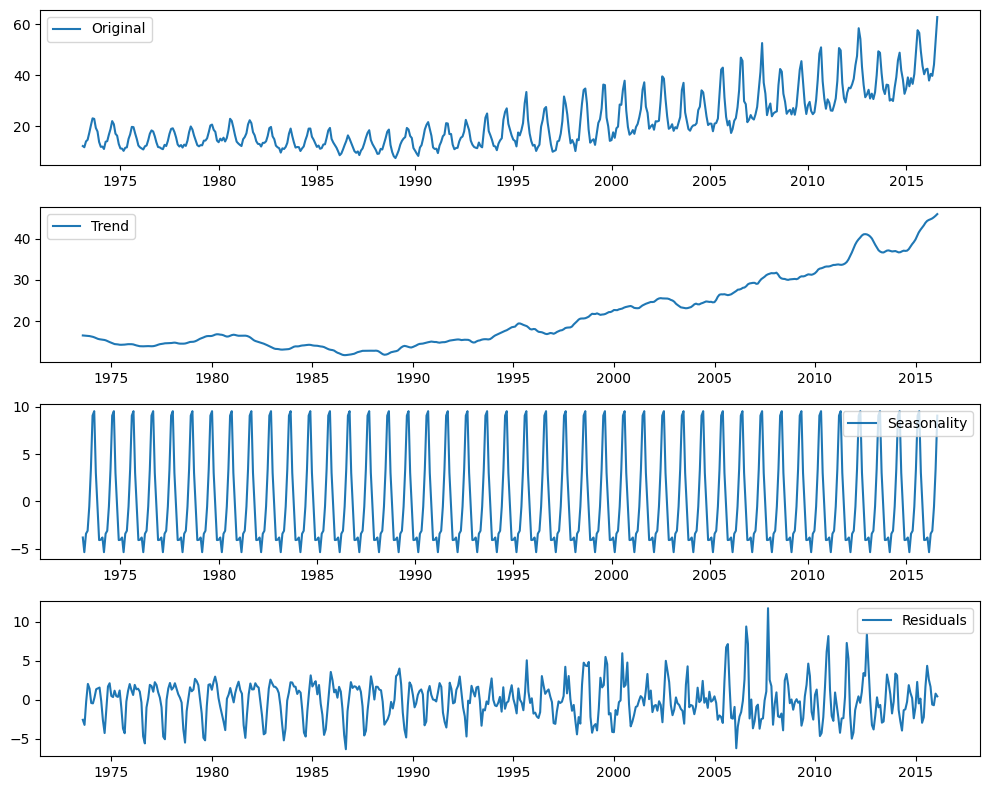

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


if mte.index.freq is None:
    mte.index.freq = 'M'  

# Performing seasonal decomposition with a manually specified period
# 12 months in a year
decomposition = seasonal_decompose(mte.dropna(), model='additive', period=12)  

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposition
plt.figure(figsize=(10, 8))  # Larger figure size for better visibility

plt.subplot(411)
plt.plot(mte, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


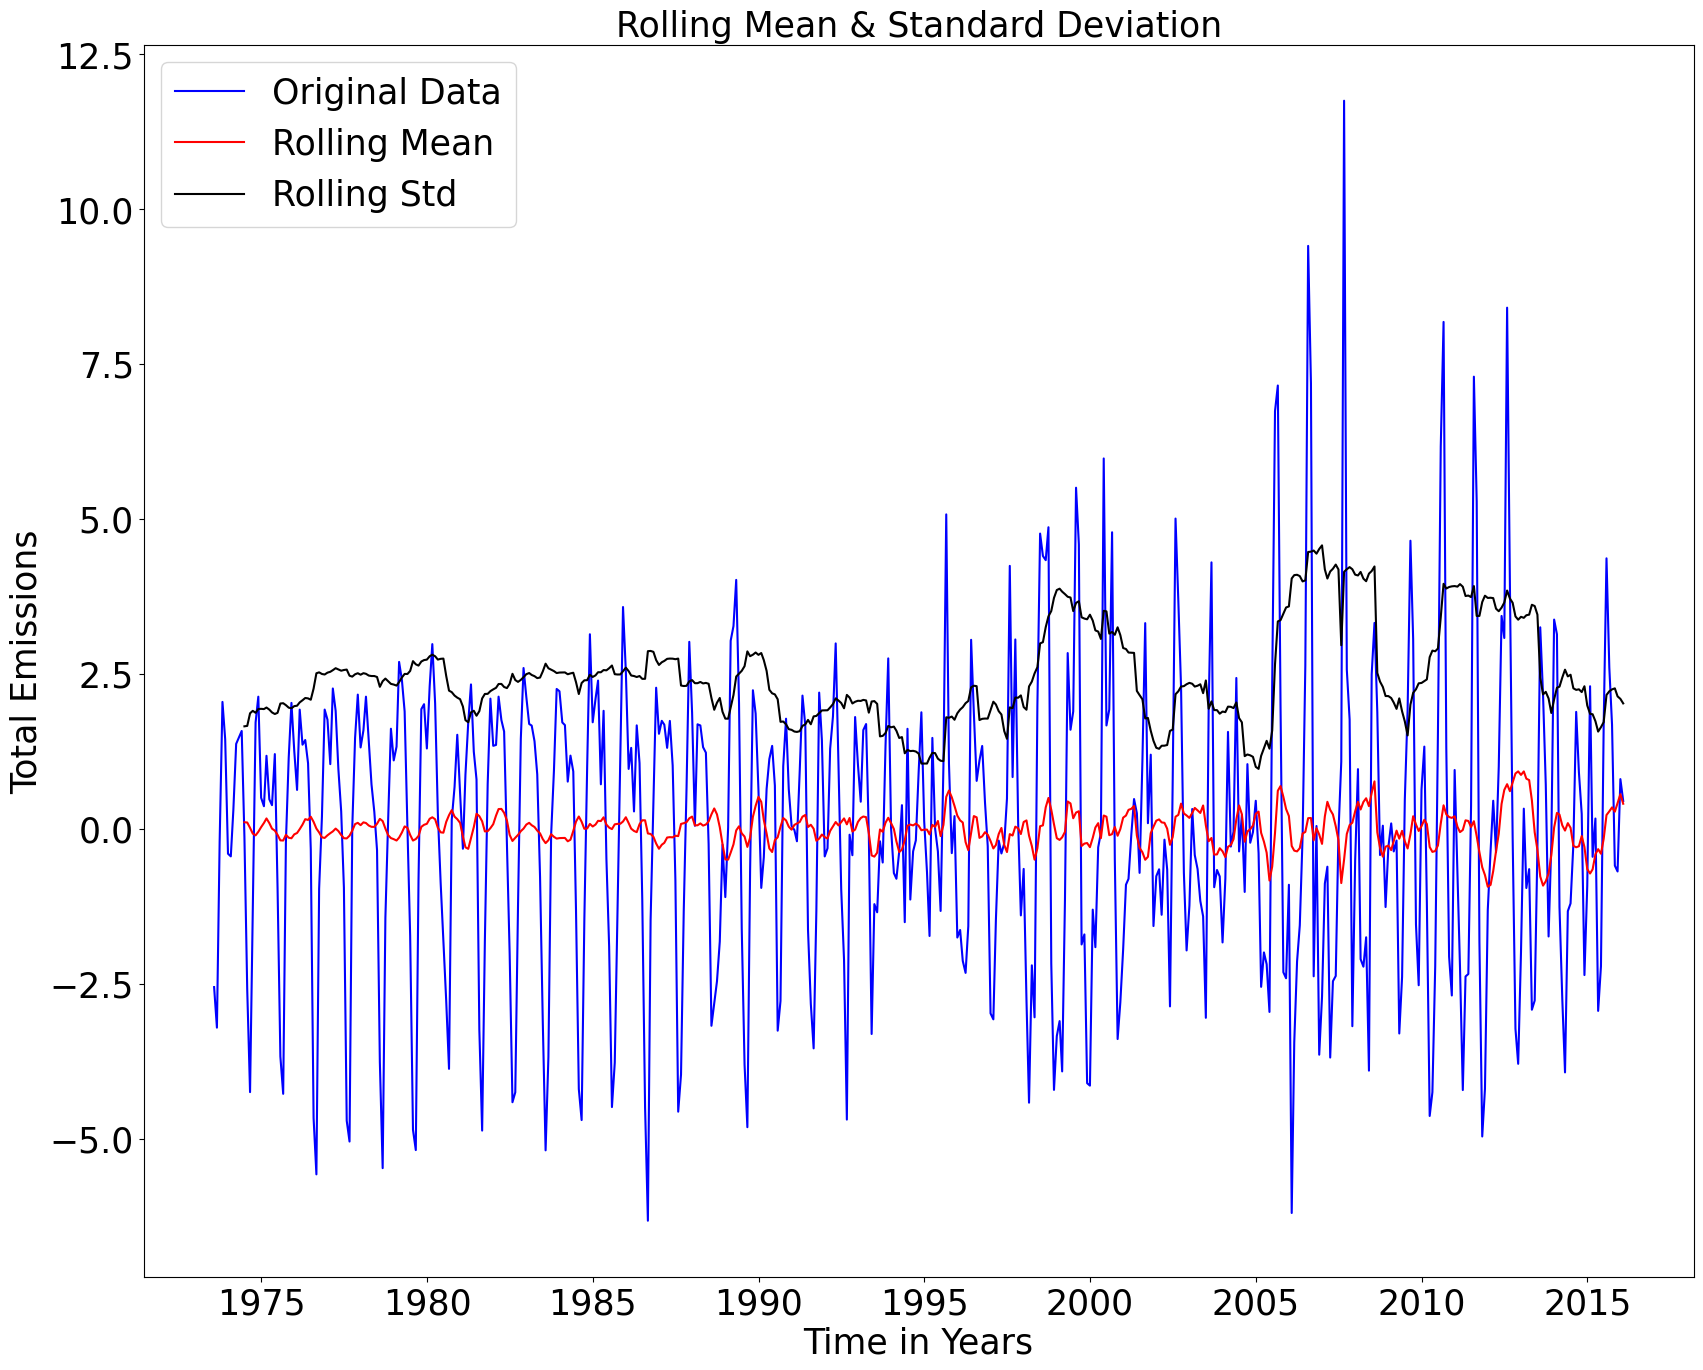

Test Statistic                -8.547084e+00
p-value                        9.439345e-14
#Lags Used                     1.900000e+01
Number of Observations Used    4.910000e+02
Critical Value (1%)           -3.443739e+00
Critical Value (5%)           -2.867444e+00
Critical Value (10%)          -2.569915e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [38]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose)
TestStationaryAdfuller(mte_decompose)

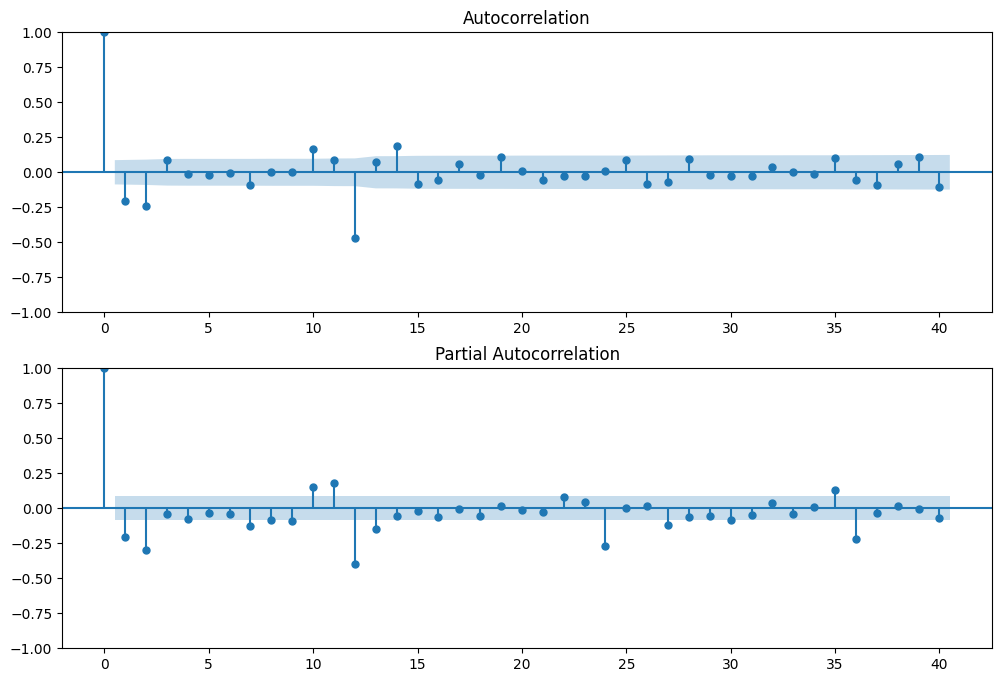

In [39]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

Autocorrelation Function (ACF)
The ACF plot shows the correlation of the series with its own lags. In our ACF plot:

The significant spike at lag 1 that quickly cuts off is typical of a differenced series, which suggests the differencing term 
𝑑
d is correctly set when preparing the data for ARIMA modeling.
The lag at which the ACF cuts off can suggest the 
𝑞
q parameter for the MA (moving average) component of an ARIMA model. In our case, since the ACF cuts off after the first lag, 
𝑞
=
1
q=1 might be a good starting point.
Partial Autocorrelation Function (PACF)
The PACF plot shows the partial correlation of a series with its own lag, excluding correlations of the intervening lags. From our PACF plot:

The significant spike at lag 1 and then a cutoff also supports the use of 
𝑝
=
1
p=1 for the AR (autoregressive) component of the ARIMA model.

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Tue, 14 May 2024   AIC                           2003.553
Time:                                                     22:00:54   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

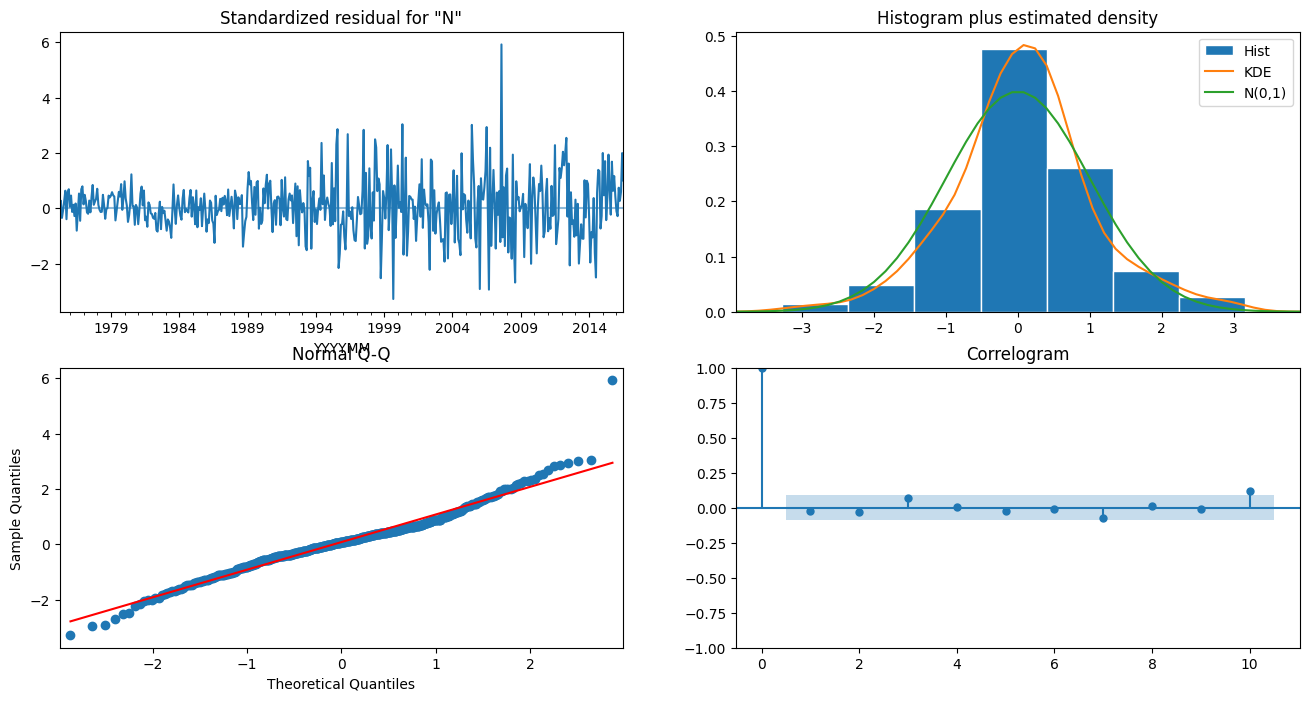

Model saved as 'sarima_model.pkl'


In [40]:
import statsmodels.api as sm
import pickle

mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1, 1, 1), 
                                seasonal_order=(0, 1, 1, 12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# Fitting the model
results = mod.fit()
print(results.summary())
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Save the model to a pickle file
with open('sarima_model.pkl', 'wb') as pkl:
    pickle.dump(results, pkl)

print("Model saved as 'sarima_model.pkl'")


<Axes: xlabel='YYYYMM'>

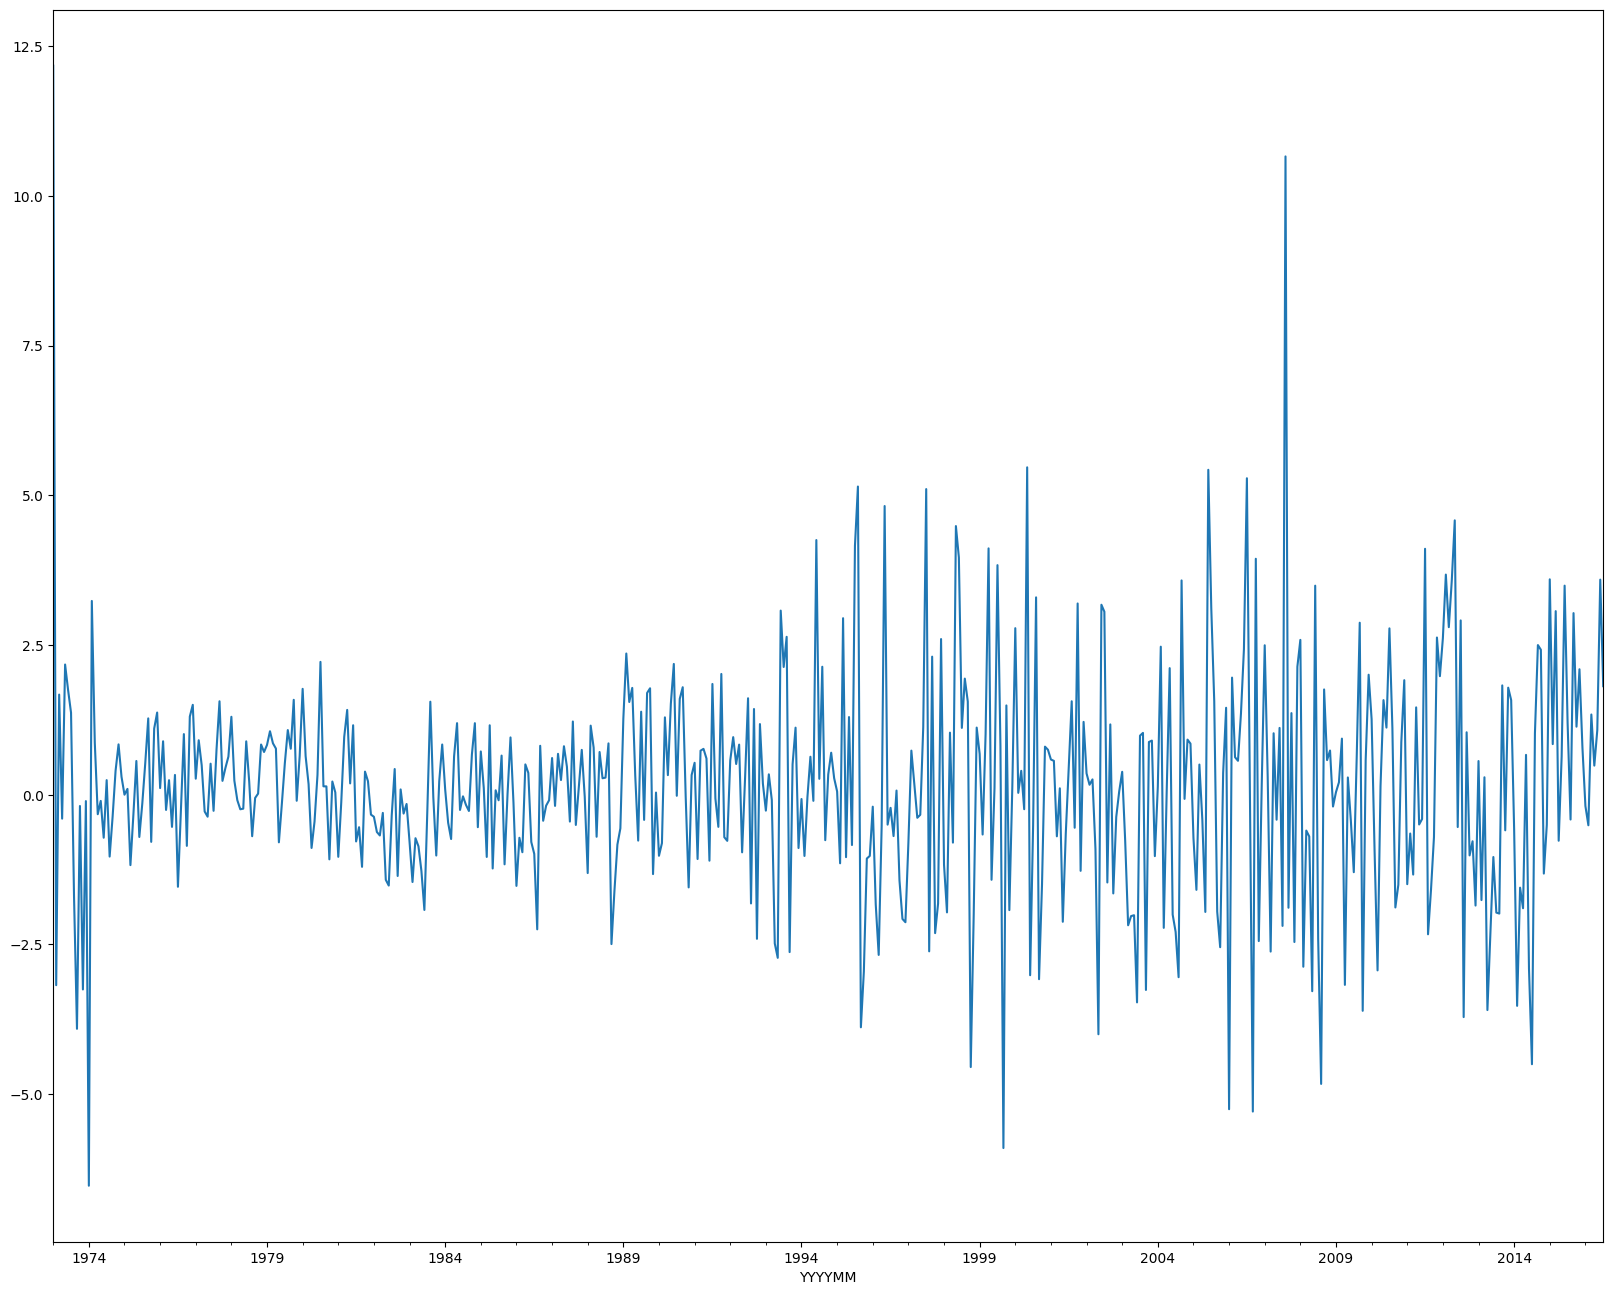

In [41]:
results.resid.plot()

The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

We can plot the real and forecasted values of the CO2 emission time series to assess how well the model fits.

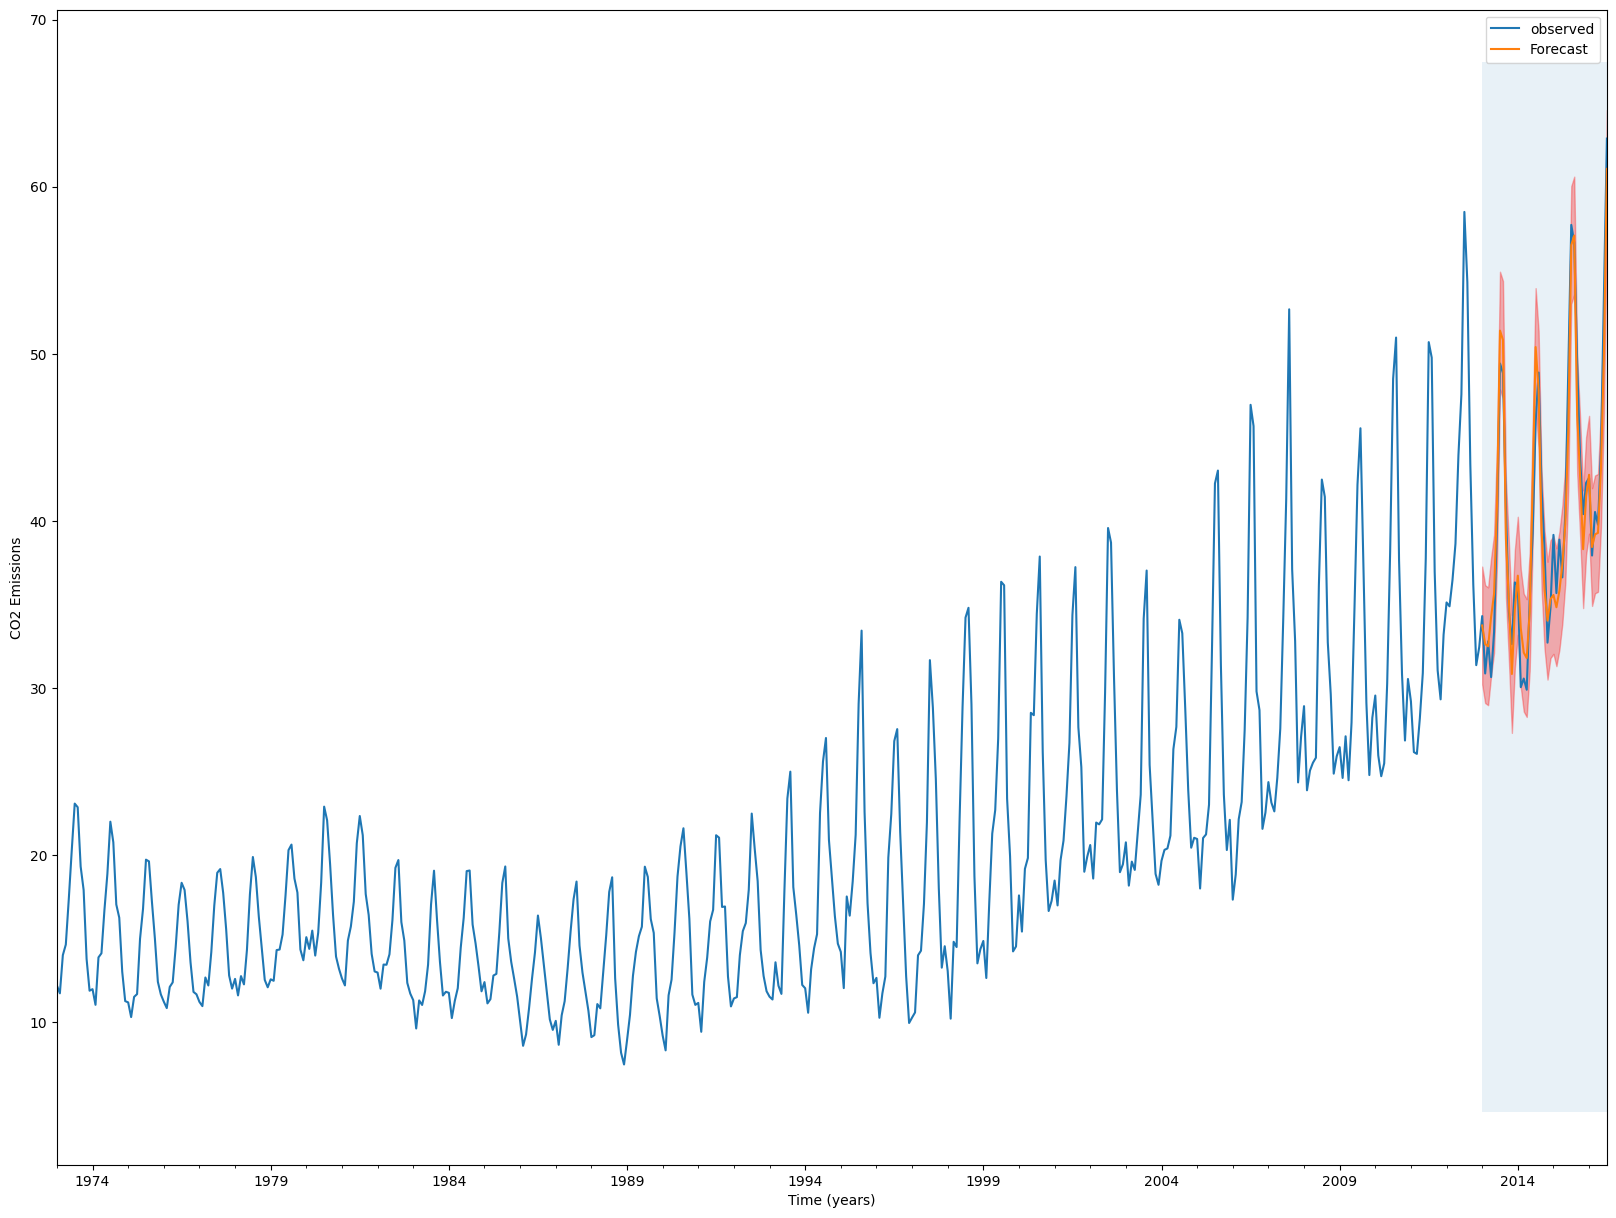

In [42]:
# Make predictions witho static forecasting
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=False, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

# Plotting
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Forecast', ax=ax)

# Fill confidence intervals
ax.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='r', alpha=.3)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2013-01-31'), mte.index[-1], alpha=.1, zorder=-1)

# Set labels and legend
ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')
plt.legend()
plt.show()

In [43]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forcast: 2.0236


# ARIMA

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                                              ARIMA(1, 2, 1)   Log Likelihood               -1336.469
Date:                                             Tue, 14 May 2024   AIC                           2678.939
Time:                                                     22:00:57   BIC                           2691.706
Sample:                                                 01-31-1973   HQIC                          2683.940
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

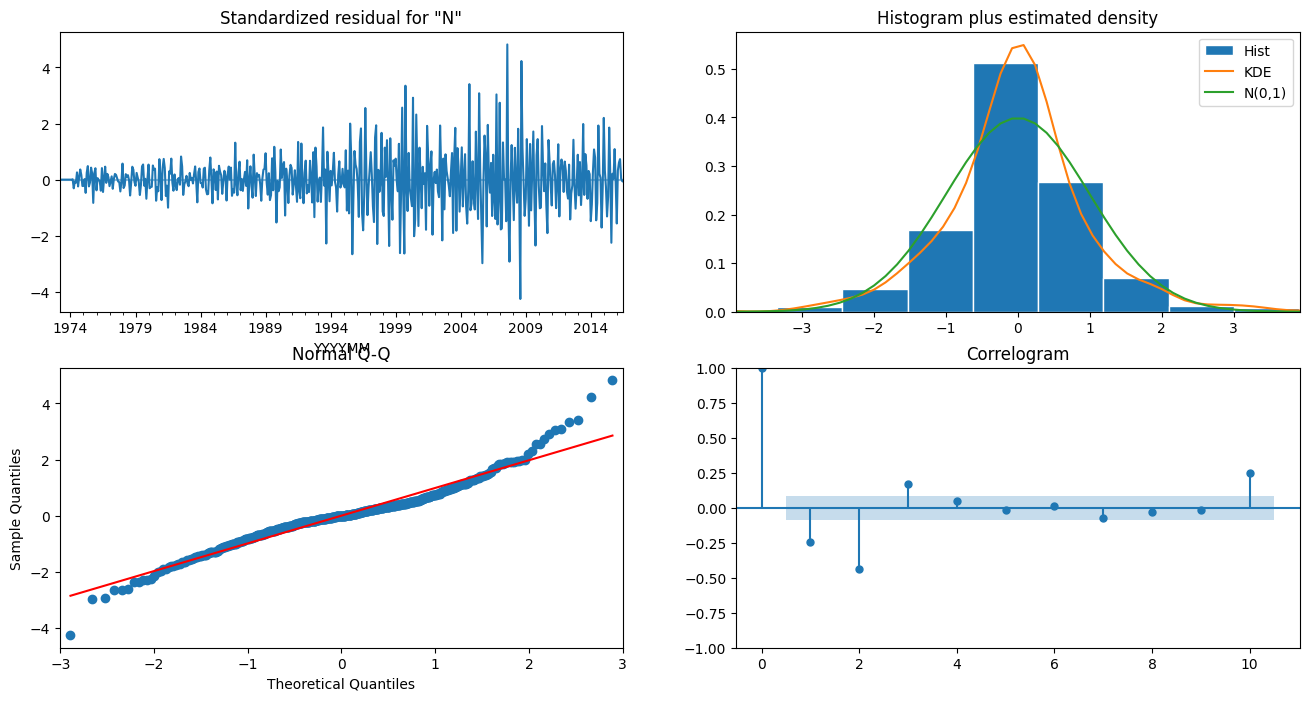

In [44]:
import statsmodels.api as sm
import pickle 
mod_arima = sm.tsa.ARIMA(mte_seasonal_first_difference, 
                         order=(1, 2, 1))

# Fitting the model
results_arima = mod_arima.fit()
print(results_arima.summary())

with open('arima_results.pkl', 'wb') as f:
    pickle.dump(results_arima, f)

print("ARIMA model results saved to 'arima_results.pkl'.")

results_arima.plot_diagnostics(figsize=(16, 8))
plt.show()

<Axes: xlabel='YYYYMM'>

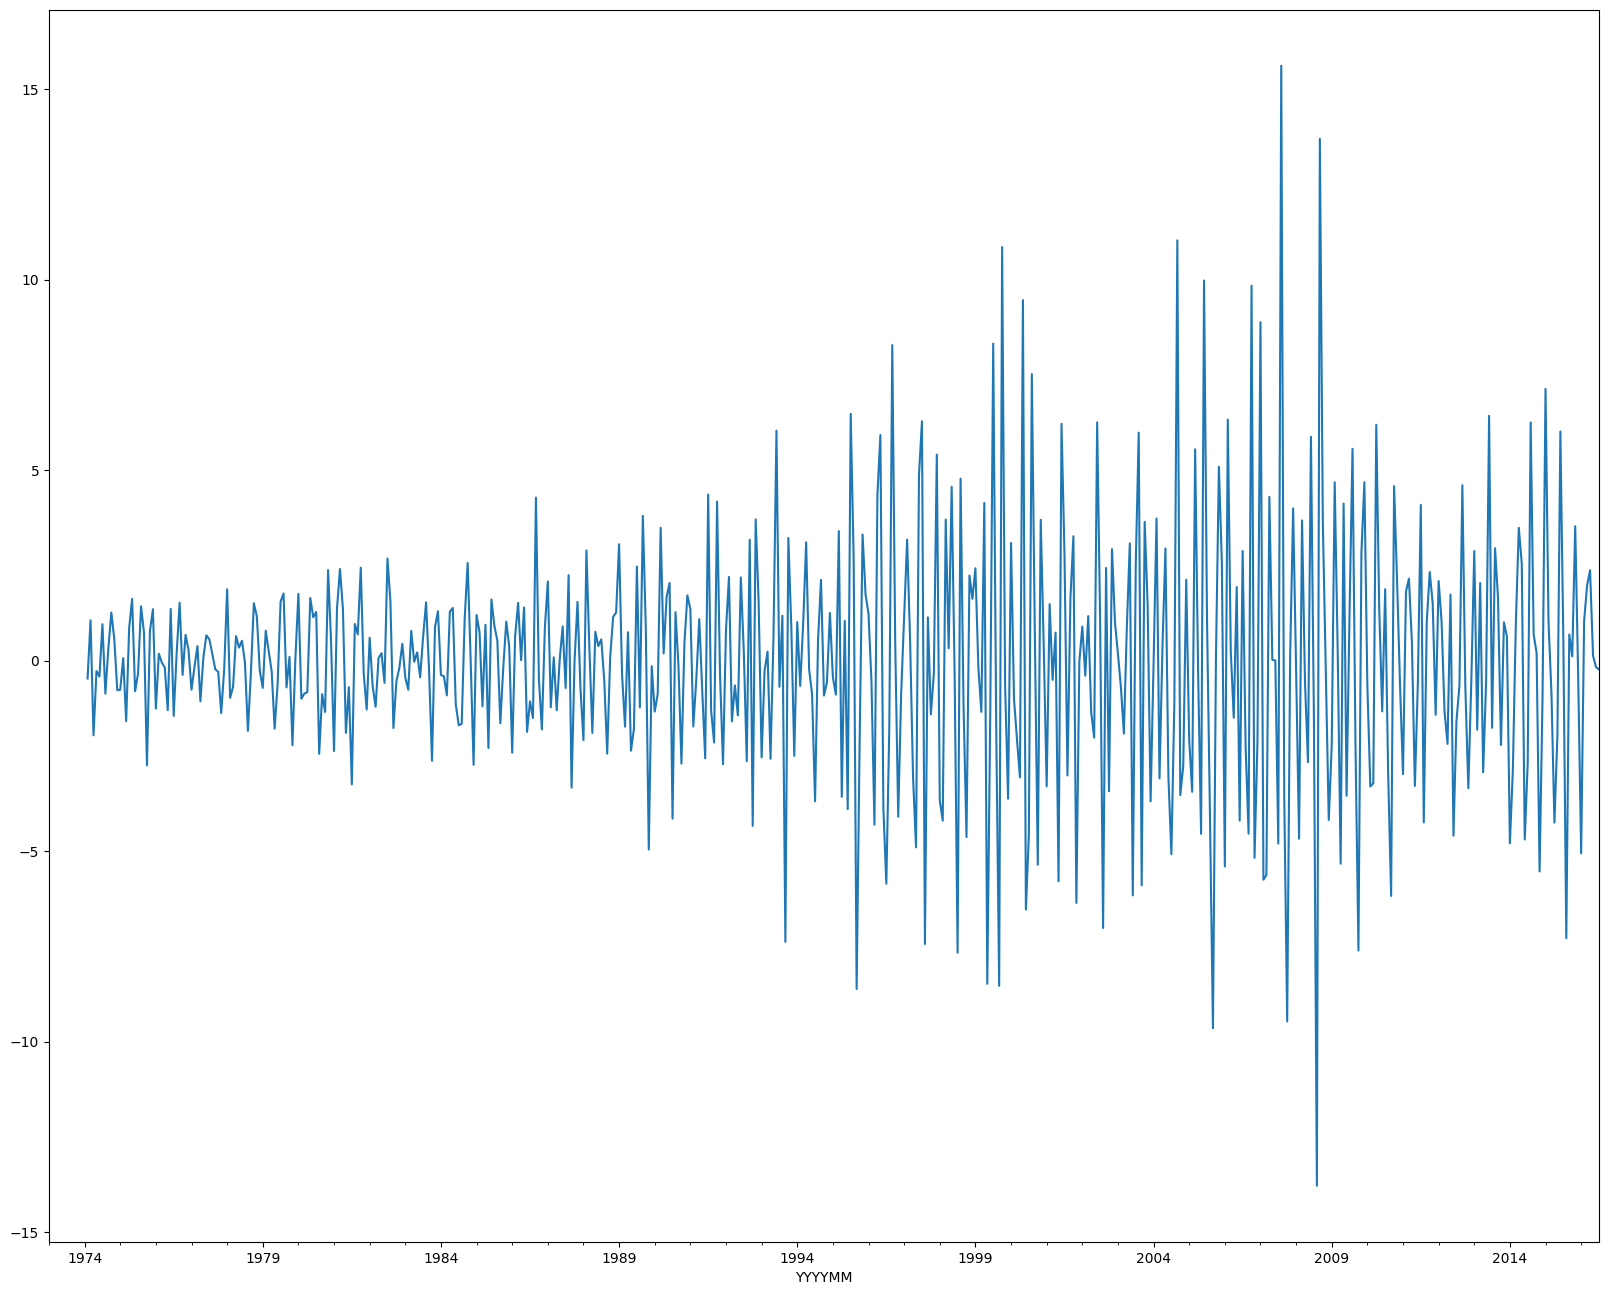

In [45]:
results_arima.resid.plot()

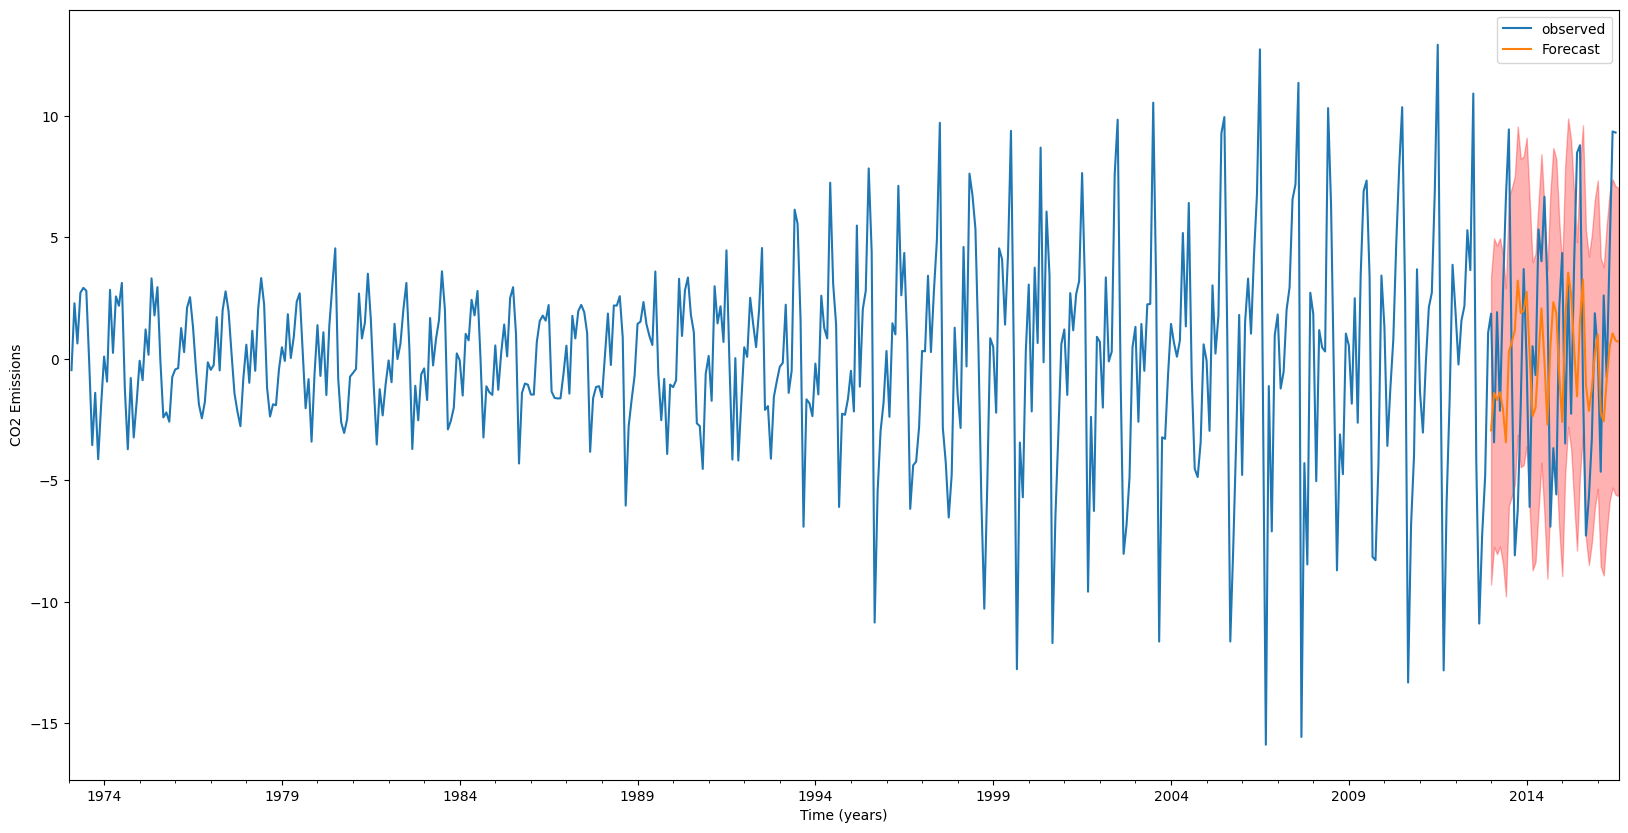

In [46]:
# Make predictions with static forecasting 
pred = results_arima.get_prediction(start=480, end=523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

# Plot forecast
ax = mte_first_difference['1973':].plot(label='observed', figsize=(20, 10))
pred.predicted_mean.plot(label='Forecast', ax=ax)

# Fill confidence intervals
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='r', alpha=.3)

# Set labels and legend
ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')
plt.legend()
plt.show()

In [47]:
pred = results_arima.get_prediction(start=480, end=523, dynamic=False)
forecasted_values = pred.predicted_mean

# Actual values from the same period
actual_values = mte[480:524]  

# Calculate MSE and RMSE
mse = ((forecasted_values - actual_values) ** 2).mean()
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1694.606675080075
Root Mean Squared Error (RMSE): 41.16560062819532


# ETS

Error: add, Trend: add, Seasonal: add, BIC: 773.8553190339501, MSE: 4.343271007793425, MAPE: 2.952328101153805, RMSE: 2.084051584724674
Error: add, Trend: add, Seasonal: mul, BIC: 715.4305007887504, MSE: 34.123599531592326, MAPE: 12.612402081838034, RMSE: 5.8415408525142
Error: add, Trend: add, Seasonal: None, BIC: 1438.3613688317955, MSE: 202.33741737999833, MAPE: 30.33143523574226, RMSE: 14.224535752705545
Error: add, Trend: mul, Seasonal: add, BIC: 773.8648796642578, MSE: 4.000339276914801, MAPE: 2.8414904179793665, RMSE: 2.000084817430201
Error: add, Trend: mul, Seasonal: mul, BIC: 795.9687479893144, MSE: 12.677933950398696, MAPE: 5.932179906849056, RMSE: 3.560608648868715
Error: add, Trend: mul, Seasonal: None, BIC: 1437.2071360596156, MSE: 130.60321219243758, MAPE: 24.10271037669989, RMSE: 11.428176240872276
Error: add, Trend: None, Seasonal: add, BIC: 763.2524531574943, MSE: 5.808081192942247, MAPE: 3.400205913531794, RMSE: 2.4099960981176394
Error: add, Trend: None, Seasonal: m

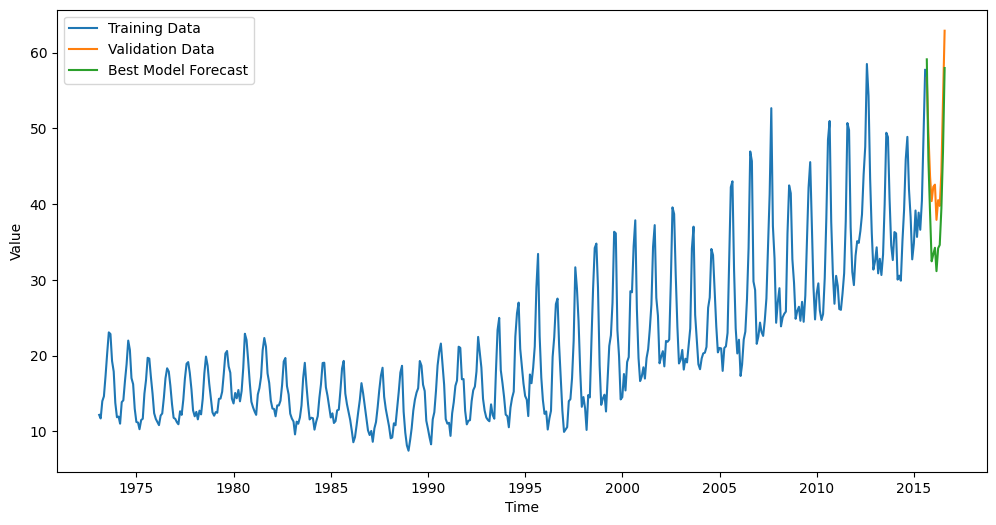

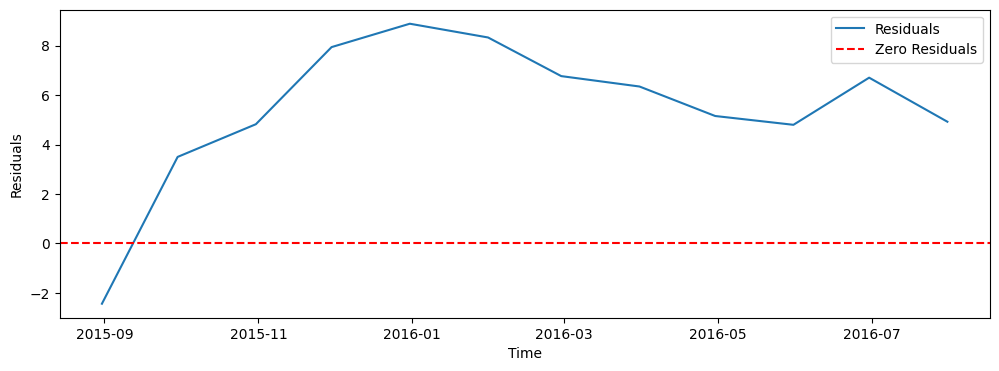

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Split data into training and validation sets
train_data = mte.iloc[:-12]  # Assuming last 12 months as validation data
val_data = mte.iloc[-12:]

best_bic = float("inf")
best_model = None

# Initialize lists to store metrics
bic_list = []
mse_list = []
mape_list = []
rmse_list = []

# Iterate over different ETS model configurations
for error_type in ['add', 'mul', None]:  # Error types: 'add' (additive), 'mul' (multiplicative), None (unknown)
    for trend_type in ['add', 'mul', None]:  # Trend types: 
        for seasonal_type in ['add', 'mul', None]:  # Seasonal types: 
            # Construct the model type string
            model_type = ''
            if error_type == 'add':
                model_type += 'A'
            elif error_type == 'mul':
                model_type += 'M'
            else:
                model_type += 'Z'

            if trend_type == 'add':
                model_type += 'A'
            elif trend_type == 'mul':
                model_type += 'M'
            else:
                model_type += 'Z'

            if seasonal_type == 'add':
                model_type += 'A'
            elif seasonal_type == 'mul':
                model_type += 'M'
            else:
                model_type += 'N'  
            
            # Create and fit the model
            model = sm.tsa.ExponentialSmoothing(train_data, 
                                                 trend=trend_type, 
                                                 seasonal=seasonal_type, 
                                                 seasonal_periods=12)
            results = model.fit()
            
            # Calculate metrics
            bic = results.bic
            mse = ((results.forecast(len(val_data)) - val_data) ** 2).mean()
            mape = np.mean(np.abs((val_data - results.forecast(len(val_data))) / val_data)) * 100
            rmse = np.sqrt(mse)
            
            # Append metrics to lists
            bic_list.append(bic)
            mse_list.append(mse)
            mape_list.append(mape)
            rmse_list.append(rmse)
            
            
            print(f'Error: {error_type}, Trend: {trend_type}, Seasonal: {seasonal_type}, BIC: {bic}, MSE: {mse}, MAPE: {mape}, RMSE: {rmse}')

            # Update best model if needed
            if bic < best_bic:
                best_bic = bic
                best_model = results

print('Best Model BIC:', best_bic)

# Forecast using the best-fitting model
forecast = best_model.forecast(len(val_data))

# Calculate evaluation metrics (MSE for comparison with ARIMA model)
mse_best = ((forecast - val_data) ** 2).mean()
mape_best = np.mean(np.abs((val_data - forecast) / val_data)) * 100
rmse_best = np.sqrt(mse_best)

print('Best Model BIC:', best_bic)
print('Mean Squared Error (MSE) - Best Model:', mse_best)
print('Mean Absolute Percentage Error (MAPE) - Best Model:', mape_best)
print('Root Mean Squared Error (RMSE) - Best Model:', rmse_best)

results_dict = {
    'best_model': best_model,
    'best_bic': best_bic,
    'mse_best': mse_best,
    'mape_best': mape_best,
    'rmse_best': rmse_best
}

# Save the results dictionary to a pickle file
with open('ets_results.pkl', 'wb') as f:
    pickle.dump(results_dict, f)

print("Results saved to 'results.pkl'.")
# Plot forecasts and residuals
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(val_data.index, val_data, label='Validation Data')
plt.plot(val_data.index, forecast, label='Best Model Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()


residuals = val_data - forecast

# Plot residuals
plt.figure(figsize=(12, 4))
plt.plot(val_data.index, residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


# SVR  

In [21]:
ts

MSN    Value  Column_Order  \
YYYYMM                                       
1973-01-01  CLEIEUS   72.076             1   
1973-02-01  CLEIEUS   64.442             1   
1973-03-01  CLEIEUS   64.084             1   
1973-04-01  CLEIEUS   60.842             1   
1973-05-01  CLEIEUS   61.798             1   
...             ...      ...           ...   
2016-03-01  TXEIEUS  115.997             9   
2016-04-01  TXEIEUS  113.815             9   
2016-05-01  TXEIEUS  129.440             9   
2016-06-01  TXEIEUS  172.074             9   
2016-07-01  TXEIEUS  201.958             9   

                                                 Description  \
YYYYMM                                                         
1973-01-01          Coal Electric Power Sector CO2 Emissions   
1973-02-01          Coal Electric Power Sector CO2 Emissions   
1973-03-01          Coal Electric Power Sector CO2 Emissions   
1973-04-01          Coal Electric Power Sector CO2 Emissions   
1973-05-01          Coal Electric Power Sector CO2 Emissions   
...                                                      ...   
2016-03-01  Total Energy Electric Power Sector CO2 Emissions   
2016-04-01  Total Energy Electric Power Sector CO2 Emissions   
2016-05-01  Total Energy Electric Power Sector CO2 Emissions   
2016-06-01  Total Energy Electric Power Sector CO2 Emissions   
2016-07-01  Total Energy Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
...                                           ...  
2016-03-01  Million Metric Tons of Carbon Dioxide  
2016-04-01  Million Metric Tons of Carbon Dioxide  
2016-05-01  Million Metric Tons of Carbon Dioxide  
2016-06-01  Million Metric Tons of Carbon Dioxide  
2016-07-01  Million Metric Tons of Carbon Dioxide  

[4323 rows x 5 columns]

In [22]:

natural_gas_emissions = ts[ts['Description'] == input_description]
natural_gas_emissions



MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  NNEIEUS  12.175             2   
1973-02-01  NNEIEUS  11.708             2   
1973-03-01  NNEIEUS  13.994             2   
1973-04-01  NNEIEUS  14.627             2   
1973-05-01  NNEIEUS  17.344             2   
...             ...     ...           ...   
2016-03-01  NNEIEUS  40.525             2   
2016-04-01  NNEIEUS  39.763             2   
2016-05-01  NNEIEUS  44.210             2   
2016-06-01  NNEIEUS  53.567             2   
2016-07-01  NNEIEUS  62.881             2   

                                                Description  \
YYYYMM                                                        
1973-01-01  Natural Gas Electric Power Sector CO2 Emissions   
1973-02-01  Natural Gas Electric Power Sector CO2 Emissions   
1973-03-01  Natural Gas Electric Power Sector CO2 Emissions   
1973-04-01  Natural Gas Electric Power Sector CO2 Emissions   
1973-05-01  Natural Gas Electric Power Sector CO2 Emissions   
...                                                     ...   
2016-03-01  Natural Gas Electric Power Sector CO2 Emissions   
2016-04-01  Natural Gas Electric Power Sector CO2 Emissions   
2016-05-01  Natural Gas Electric Power Sector CO2 Emissions   
2016-06-01  Natural Gas Electric Power Sector CO2 Emissions   
2016-07-01  Natural Gas Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
...                                           ...  
2016-03-01  Million Metric Tons of Carbon Dioxide  
2016-04-01  Million Metric Tons of Carbon Dioxide  
2016-05-01  Million Metric Tons of Carbon Dioxide  
2016-06-01  Million Metric Tons of Carbon Dioxide  
2016-07-01  Million Metric Tons of Carbon Dioxide  

[523 rows x 5 columns]

Mean Squared Error on Training Data: 7.741365212055047
Mean Squared Error on Testing Data: 52.60066192444773
SVR model and results saved to 'svr_results.pkl'.


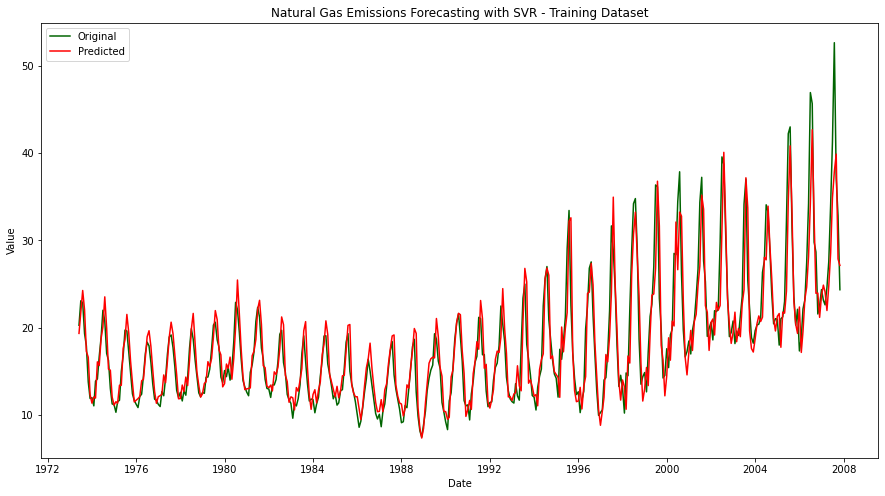

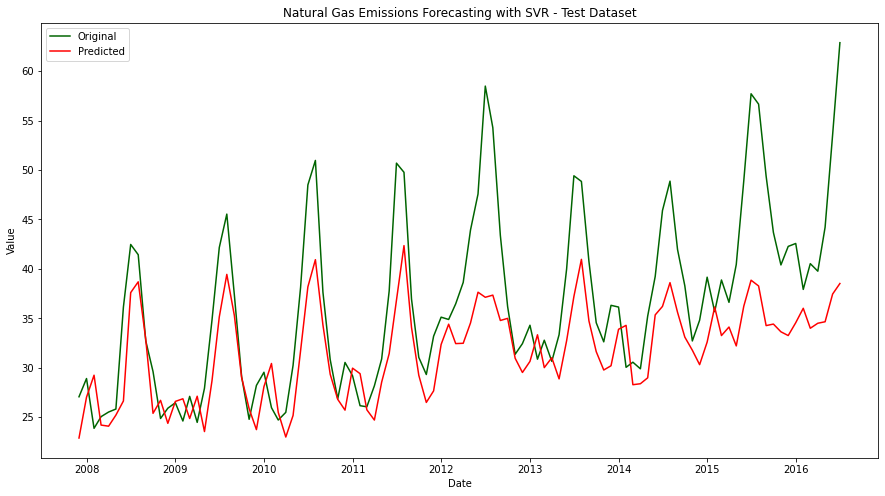

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


data = natural_gas_emissions[['Value']].dropna()

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define a function to create the dataset for time series forecasting for time stamps inclusion
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5  # Adjust this as needed
X, y = create_dataset(data_scaled, data_scaled, TIME_STEPS)


train_size = int(len(X) * 0.8)  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# SVR model
model = SVR(kernel='rbf', gamma=0.5, C=10, epsilon=0.05)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)


train_pred = model.predict(X_train.reshape(X_train.shape[0], -1))
test_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

# Inverse scaling
train_pred_inv = scaler.inverse_transform(train_pred.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_pred_inv = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse_train = mean_squared_error(y_train_inv, train_pred_inv)
mse_test = mean_squared_error(y_test_inv, test_pred_inv)
print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Testing Data:", mse_test)


results_dict = {
    'model': model,
    'mse_train': mse_train,
    'mse_test': mse_test,
    'train_pred_inv': train_pred_inv,
    'y_train_inv': y_train_inv,
    'test_pred_inv': test_pred_inv,
    'y_test_inv': y_test_inv
}


print("SVR model and results saved to 'svr_results.pkl'.")
# Plotting the results for train dataset
plt.figure(figsize=(15, 8))
plt.plot(data.index[TIME_STEPS:train_size + TIME_STEPS], y_train_inv, label='Original', color='darkgreen')
plt.plot(data.index[TIME_STEPS:train_size + TIME_STEPS], train_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Natural Gas Emissions Forecasting with SVR - Training Dataset')
plt.legend()
plt.show()

# Plotting the results for test dataset
plt.figure(figsize=(15, 8))
plt.plot(data.index[train_size + TIME_STEPS:], y_test_inv, label='Original', color='darkgreen')
plt.plot(data.index[train_size + TIME_STEPS:], test_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Natural Gas Emissions Forecasting with SVR - Test Dataset')
plt.legend()
plt.show()

# prophet model

Importing plotly failed. Interactive plots will not work.
22:01:05 - cmdstanpy - INFO - Chain [1] start processing
22:01:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 31.5644203774323
Mean Absolute Percentage Error (MAPE): 9.853121324073118
Root Mean Squared Error (RMSE): 5.6182221723096974
Prophet model and results saved to 'prophet_results.pkl'.


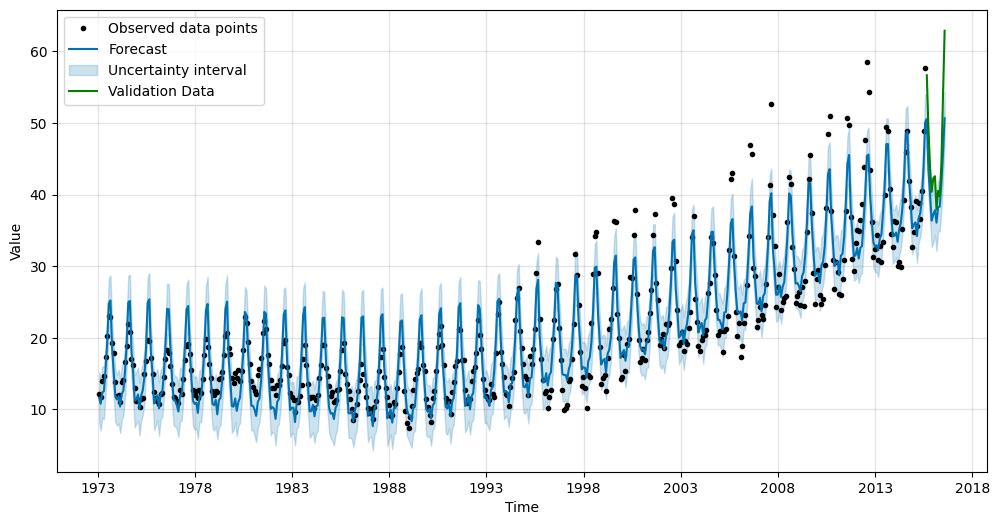

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


# Prepare the data for Prophet
df = pd.DataFrame({'ds': mte.index, 'y': mte.values})
df.reset_index(drop=True, inplace=True)

# Split data into training and validation sets
train_data = df.iloc[:-12]  # Assuming last 12 months as validation data
val_data = df.iloc[-12:]

# Initialize Prophet model with potentially yearly, weekly, and daily seasonality components, holiday effects 
model = Prophet(
    seasonality_mode='additive',  # Additive yeilded better results 
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    holidays=None,  
    changepoint_prior_scale=0.05,  
)

# Fit the model with automatic optimization of parameters
model.fit(train_data)

# Make predictions for the validation period
future = model.make_future_dataframe(periods=len(val_data), freq='M')
forecast = model.predict(future)

# Calculate evaluation metrics
mse = ((forecast.loc[forecast['ds'].isin(val_data['ds']), 'yhat'] - val_data['y']) ** 2).mean()
mape = np.mean(np.abs((val_data['y'] - forecast.loc[forecast['ds'].isin(val_data['ds']), 'yhat']) / val_data['y'])) * 100
rmse = np.sqrt(mse)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Root Mean Squared Error (RMSE):', rmse)

results_dict = {
    'model': model,
    'forecast': forecast,
    'val_data': val_data,
    'mse': mse,
    'mape': mape,
    'rmse': rmse
}

# Save the results dictionary to a pickle file
with open('prophet_results.pkl', 'wb') as f:
    pickle.dump(results_dict, f)

print("Prophet model and results saved to 'prophet_results.pkl'.")
# Plot forecasts and residuals
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.plot(val_data['ds'], val_data['y'], label='Validation Data', color='green')
ax.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


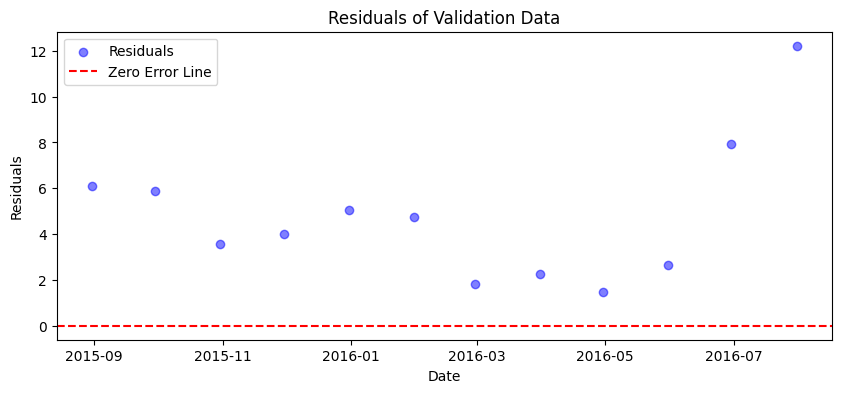

In [53]:
# Calculate residuals
residuals = val_data['y'] - forecast.loc[forecast['ds'].isin(val_data['ds']), 'yhat']

# Plot residuals
plt.figure(figsize=(10, 4))
plt.scatter(val_data['ds'], residuals, color='blue', label='Residuals', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of Validation Data')
plt.legend()
plt.show()


In [149]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings

import matplotlib.pylab
from matplotlib.pylab import rcParams

from sklearn.neural_network import MLPRegressor

rcParams['figure.figsize'] = 20, 16
warnings.filterwarnings("ignore")

# Data Collection and Preprocessing
df = pd.read_csv("MER_T12_06.csv")
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors='coerce')
df['YYYYMM'] = pd.to_datetime(df['YYYYMM'], format='%Y%m', errors='coerce')
df.set_index('YYYYMM', inplace=True)
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts['Value'] = pd.to_numeric(ts['Value'], errors='coerce')
ts.dropna(inplace=True)

# Group data by 'Description' column
DESCRIPTION = 'Natural Gas Electric Power Sector CO2 Emissions'
DESC_NAME = "NaturalGas"
Energy_sources = ts[ts['Description'] == DESCRIPTION]

# Inserting Data into the Database

In [150]:
import sqlite3

conn = sqlite3.connect('energy_data.db')            # Connect to SQLite database

ts.to_sql('energy_data', conn, if_exists='replace')     # Write the DataFrame to a SQLite table

conn.commit()
conn.close()

# ANN

Energy Source: Natural Gas Electric Power Sector CO2 Emissions


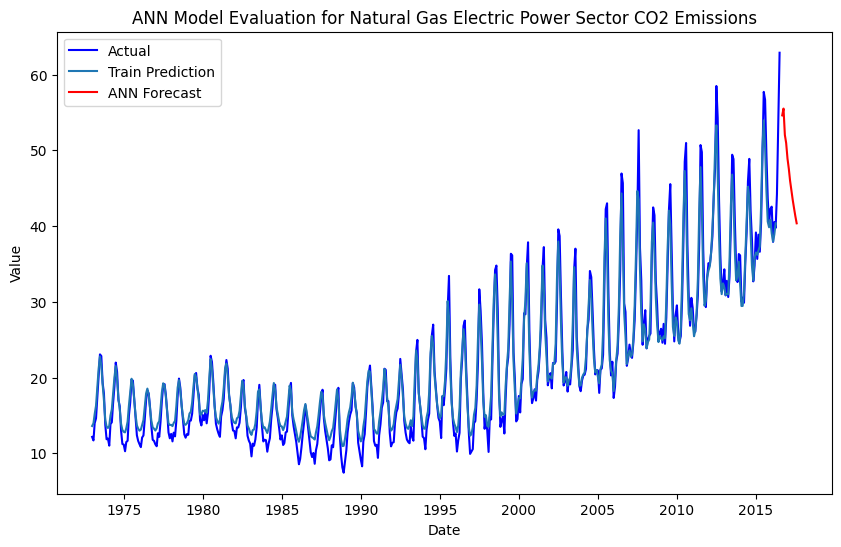

ANN RMSE: 9.350252141651637
Next Year's Forecasted Values:
[[54.6146397 ]
 [55.50788511]
 [52.02847073]
 [50.9642221 ]
 [48.90549023]
 [47.53784475]
 [46.00552552]
 [44.72429277]
 [43.47780301]
 [42.36272394]
 [41.31846365]
 [40.36486274]]


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import pickle

# ANN Model
def ann_model(data, forecast_horizon=12):
    # Scaling data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Convert an array of values into a dataset matrix
    def create_dataset(data, look_back=1):
        X, Y = [], []
        for i in range(len(data) - look_back - 1):
            a = data[i:(i + look_back), 0]
            X.append(a)
            Y.append(data[i + look_back, 0])
        return np.array(X), np.array(Y)

    look_back = 2
    train_X, train_Y = create_dataset(scaled_data, look_back)

    # Create and fit the MLP model
    model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200)
    model.fit(train_X, train_Y)

    # Make predictions
    forecast_input = scaled_data[-look_back:].reshape((1, look_back))
    forecast_output = []
    for _ in range(forecast_horizon):
        forecast_value = model.predict(forecast_input)
        forecast_output.append(forecast_value[0])
        forecast_input = np.append(forecast_input[:, 1:], forecast_value[0].reshape((1, 1)), axis=1)

    # Invert predictions
    forecast_output = scaler.inverse_transform(np.array(forecast_output).reshape(-1, 1))

    # Predict training data
    train_predict = model.predict(train_X)
    train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))

    return forecast_output, train_predict, model

# Model Evaluation and Comparison
def evaluate_ann_model(data, title):
    data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
    data.dropna(inplace=True)

    forecast_horizon = 12  # Predict for the next 12 months
    forecast_output, train_predict, model = ann_model(data[['Value']], forecast_horizon=forecast_horizon)

    # Calculate RMSE for ANN model
    ann_rmse = np.sqrt(mean_squared_error(data['Value'][-forecast_horizon:], forecast_output[-forecast_horizon:]))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Value'], label='Actual', color='blue')
    plt.plot(data.index[:len(train_predict)], train_predict, label='Train Prediction')
    plt.plot(pd.date_range(start=data.index[-1], periods=len(forecast_output) + 1, freq='M')[1:], forecast_output, label='ANN Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

    print("ANN RMSE:", ann_rmse)

    return ann_rmse, forecast_output, model

# Example usage
data = Energy_sources
title = "ANN Model Evaluation for Natural Gas Electric Power Sector CO2 Emissions"

print(f"Energy Source: Natural Gas Electric Power Sector CO2 Emissions")
ann_rmse, ann_forecast, model = evaluate_ann_model(data, title)

# Save the model
with open('ann_results.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model
with open('ann_results.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Print the next year's forecasted values
print("Next Year's Forecasted Values:")
print(ann_forecast)

# Plotting next year's forecast
forecast_horizon = 12  # Example forecast horizon
forecast_input = data[['Value']].values[-2:].reshape(1, -1)
next_forecast = []
for _ in range(forecast_horizon):
    forecast_value = loaded_model.predict(forecast_input)
    next_forecast.append(forecast_value[0])
    forecast_input = np.append(forecast_input[:, 1:], forecast_value[0].reshape((1, 1)), axis=1)

# Invert predictions
next_forecast = scaler.inverse_transform(np.array(next_forecast).reshape(-1, 1))

# Plot the next year's forecast
# plt.figure(figsize=(10, 6))
# plt.plot(data.index, data['Value'], label='Actual', color='blue')
# plt.plot(pd.date_range(start=data.index[-1], periods=len(next_forecast) + 1, freq='M')[1:], next_forecast, label='Next Year Forecast', color='green')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title(f"Next Year's Forecast for Natural Gas Electric Power Sector CO2 Emissions")
# plt.legend()
# plt.show()


# Hybrid ANN-ARIMA

Energy Source: Natural Gas Electric Power Sector CO2 Emissions


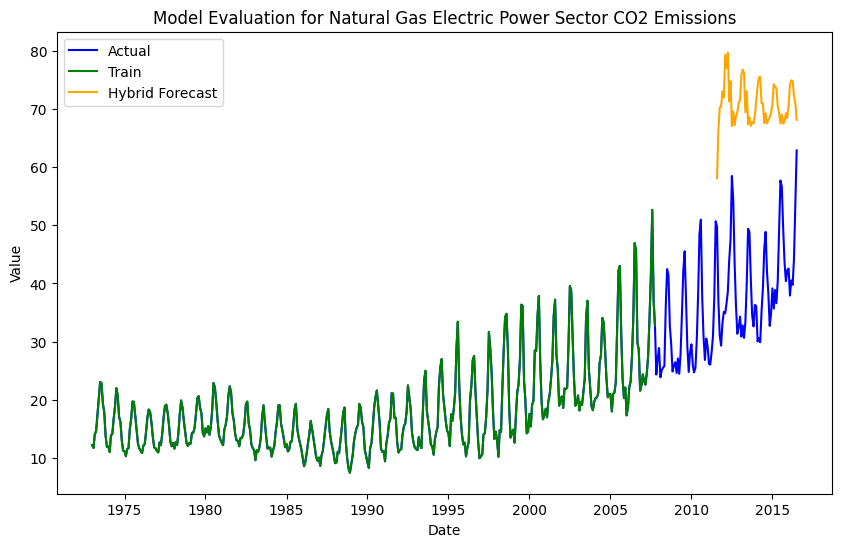

Hybrid RMSE: 32.30041270149407
Hybrid RMSE (% of actual range): 96.20949185802303 %
Hybrid model saved to 'hybrid_model_v2.pkl'.


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pickle

# ARIMA Model
def arima_model(data, forecast_horizon=30):
    # Fit ARIMA model
    mod_arima = sm.tsa.ARIMA(data, order=(5, 1, 0))
    results_arima = mod_arima.fit()

    # Make predictions
    pred = results_arima.get_prediction(start=0, end=len(data) + forecast_horizon - 1, dynamic=False)
    arima_forecast = pred.predicted_mean

    return arima_forecast

def ann_model(data, arima_predictions, forecast_horizon=30, look_back=5):
    # Combine original data with ARIMA predictions as additional features
    combined_data = np.column_stack((data, arima_predictions[:len(data)]))

    # Scaling data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(combined_data)

    # Convert an array of values into a dataset matrix
    def create_dataset(data, look_back=1):
        X, Y = [], []
        for i in range(len(data) - look_back - 1):
            a = data[i:(i + look_back), :]
            X.append(a)
            Y.append(data[i + look_back, 0])  # We want to predict the original data
        return np.array(X), np.array(Y)

    train_X, train_Y = create_dataset(scaled_data, look_back)

    # Create and fit the MLP model
    model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=500)
    model.fit(train_X.reshape(train_X.shape[0], -1), train_Y)  # Adjusted reshaping here

    # Make predictions
    forecast_input = scaled_data[-look_back:].reshape((1, -1))  # Reshape to match the number of features
    forecast_output = []
    for _ in range(forecast_horizon):
        forecast_value = model.predict(forecast_input)
        forecast_output.append(forecast_value[0])
        forecast_input = np.append(forecast_input[:, 1:], forecast_value[0].reshape((1, 1)), axis=1)

    # Invert predictions
    forecast_output = scaler.inverse_transform(np.hstack((np.array(forecast_output).reshape(-1, 1), 
                                                          np.zeros((forecast_horizon, 1)))))  # Adjusted shape here
    forecast_output = forecast_output[:, 0]

    return forecast_output


def hybrid_model_v2(data, forecast_horizon=30):
    # ARIMA Model
    arima_forecast = arima_model(data, forecast_horizon)

    # Calculate residuals
    residuals = data - arima_forecast[:len(data)]

    # ANN Model
    ann_forecast = ann_model(data.to_numpy().reshape(-1, 1), residuals, forecast_horizon)

    # Truncate ARIMA forecast to match the length of ANN forecast
    arima_forecast_truncated = arima_forecast[:len(ann_forecast)]

    # Summing ARIMA and ANN outputs
    hybrid_forecast = arima_forecast_truncated + ann_forecast

    return hybrid_forecast

def evaluate_hybrid_model_v2(data, title, forecast_horizon=30):
    data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
    data.dropna(inplace=True)

    # Splitting data into train and test sets
    train_size = int(len(data) * 0.8)
    train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

    # Actual values
    actual_values = data['Value'].values

    # Training values
    train_values = np.full_like(actual_values, np.nan)
    train_values[:train_size] = actual_values[:train_size]

    # Hybrid model forecast
    hybrid_forecast = hybrid_model_v2(data['Value'], forecast_horizon)
    hybrid_values = np.full_like(actual_values, np.nan)
    hybrid_values[-forecast_horizon:] = hybrid_forecast

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, actual_values, label='Actual', color='blue')
    plt.plot(data.index, train_values, label='Train', color='green')
    plt.plot(data.index, hybrid_values, label='Hybrid Forecast', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

    # Calculate RMSE for Hybrid model
    hybrid_rmse = np.sqrt(mean_squared_error(actual_values[-forecast_horizon:], hybrid_forecast))
    actual_range = np.max(actual_values[-forecast_horizon:]) - np.min(actual_values[-forecast_horizon:])
    hybrid_rmse_percentage = (hybrid_rmse / actual_range) * 100

    print("Hybrid RMSE:", hybrid_rmse)
    print("Hybrid RMSE (% of actual range):", hybrid_rmse_percentage, "%")

    # Save the hybrid model
    with open('hybrid_model_v2.pkl', 'wb') as f:
        pickle.dump(hybrid_model_v2, f)

    print("Hybrid model saved to 'hybrid_model_v2.pkl'.")
    return hybrid_rmse, hybrid_rmse_percentage, hybrid_values, data.index

print(f"Energy Source: Natural Gas Electric Power Sector CO2 Emissions")
rmse, rmsepercentage, values, dates = evaluate_hybrid_model_v2(Energy_sources, f'Model Evaluation for Natural Gas Electric Power Sector CO2 Emissions', forecast_horizon=60)

temp = []

import sqlite3

conn = sqlite3.connect('energy_data.db')            # Connect to SQLite database

results = pd.DataFrame()

metrics = pd.DataFrame()

results["date"] = dates
results["predResults"] = values
results['model'] = "hybrid"
results['description'] = "Natural Gas Electric Power Sector CO2 Emissions"

results.to_sql('predictions', conn, if_exists='replace')     # Write the DataFrame to a SQLite table

temp.append(rmse)
metrics['rmse'] = temp
temp[0] = rmsepercentage
metrics['rmsePercent'] = temp
metrics['model'] = "hybrid"
metrics['description'] = "Natural Gas Electric Power Sector CO2 Emissions"

metrics.to_sql('metrics', conn, if_exists='replace')     # Write the DataFrame to a SQLite table

conn.commit()
conn.close()

# LSTM

Epoch 1/10
416/416 - 4s - 9ms/step - loss: 0.0134
Epoch 2/10
416/416 - 1s - 2ms/step - loss: 0.0058
Epoch 3/10
416/416 - 2s - 4ms/step - loss: 0.0043
Epoch 4/10
416/416 - 1s - 2ms/step - loss: 0.0042
Epoch 5/10
416/416 - 1s - 3ms/step - loss: 0.0043
Epoch 6/10
416/416 - 2s - 4ms/step - loss: 0.0044
Epoch 7/10
416/416 - 1s - 3ms/step - loss: 0.0042
Epoch 8/10
416/416 - 1s - 3ms/step - loss: 0.0043
Epoch 9/10
416/416 - 1s - 2ms/step - loss: 0.0043
Epoch 10/10
416/416 - 1s - 3ms/step - loss: 0.0042
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Train Score: 3.53 RMSE
Test Score: 5.99 RMSE


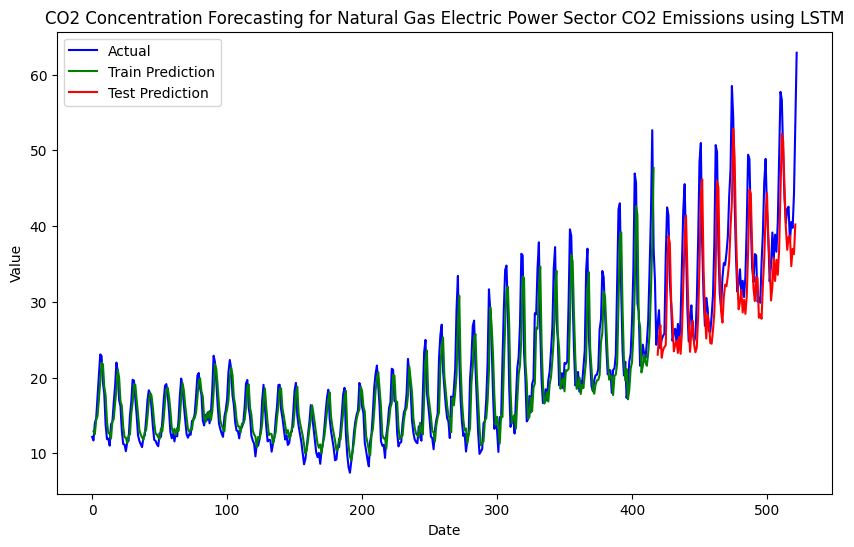

Model saved to LSTM_results_NaturalGas.pkl


In [86]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import warnings

warnings.filterwarnings("ignore")

# Data Collection and Preprocessing
df = pd.read_csv("MER_T12_06.csv")
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors='coerce')
df['YYYYMM'] = pd.to_datetime(df['YYYYMM'], format='%Y%m', errors='coerce')
df.set_index('YYYYMM', inplace=True)
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts['Value'] = pd.to_numeric(ts['Value'], errors='coerce')
ts.dropna(inplace=True)

# Selecting data for "Natural Gas Electric Power Sector CO2 Emissions"
ts_natural_gas = ts[ts['Description'] == 'Natural Gas Electric Power Sector CO2 Emissions']

# Function to plot time series data
def plot_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Value'], label='Actual', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Function to create dataset for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(ts_natural_gas[['Value']])

# Splitting data into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Designing LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(dataset), label='Actual', color='blue')
plt.plot(trainPredictPlot, label='Train Prediction', color='green')
plt.plot(testPredictPlot, label='Test Prediction', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('CO2 Concentration Forecasting for Natural Gas Electric Power Sector CO2 Emissions using LSTM')
plt.legend()
plt.show()

# Save the model to disk
filename = f"LSTM_results_{DESC_NAME}.pkl"
pickle.dump(model, open(filename, 'wb'))
print("Model saved to", filename)

In [ ]:
results_db = pd.DataFrame(columns=['date', 'predictedValues', 'model', 'description'])